In [ ]:
# we have two different sheets containing daily prices of gold & silver with opening value, highest & lowest values, and the volume traded
# let's try to analyse the data and find insights
# Let's first import all the necessary libraries that we will require 

In [6]:
import pandas as pd
import numpy as np

In [7]:
import matplotlib
# we might not require these two but just in case
import os
import math

In [8]:
# to help us plot different types of graphs
import seaborn as sns

In [ ]:
# let's read both the files

In [9]:
dfg=pd.read_csv('/Users/vaibhavjha/Desktop/Data/archive/gold prices.csv')
dfs=pd.read_csv('/Users/vaibhavjha/Desktop/Data/archive/silver prices.csv')

In [10]:
dfg.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,1915.2,146770.0,1922.4,1933.5,1914.2
1,08/16/2023,1928.3,124766.0,1933.1,1938.2,1922.0
2,08/15/2023,1935.2,161512.0,1939.4,1944.3,1927.5
3,08/14/2023,1944.0,117514.0,1945.6,1948.2,1934.2
4,08/11/2023,1946.6,119090.0,1944.9,1953.6,1942.7


In [11]:
dfs.head()

,Date,Close/Last,Volume,Open,High,Low
0,08/17/2023,23.042,11441.0,22.800,23.385,22.725
1,08/16/2023,22.856,10802.0,22.905,23.170,22.770
2,08/15/2023,22.656,60396.0,22.650,22.770,22.265
3,08/14/2023,22.708,51908.0,22.740,22.820,22.410
4,08/11/2023,22.743,48043.0,22.760,22.910,22.610


In [12]:
dfg.describe()

,Close/Last,Volume,Open,High,Low
count,2539.000000,2511.000000,2539.000000,2539.000000,2539.000000
mean,1467.437456,183765.289128,1467.455967,1477.035880,1457.630721
std,282.891621,98028.942525,283.126968,285.232942,280.366732
min,1049.600000,1.000000,1051.500000,1062.700000,1045.400000
25%,1243.900000,123166.500000,1243.850000,1251.250000,1235.800000
50%,1321.400000,172127.000000,1321.700000,1329.300000,1314.000000
75%,1774.050000,233415.000000,1773.950000,1785.000000,1763.550000
max,2069.400000,787217.000000,2076.400000,2085.400000,2049.000000


In [13]:
dfs.describe()

,Close/Last,Volume,Open,High,Low
count,2539.000000,2476.000000,2539.000000,2539.000000,2539.000000
mean,19.132079,56836.897819,19.142883,19.360299,18.905609
std,3.750198,31718.237093,3.762177,3.826964,3.672283
min,11.772000,1.000000,11.975000,12.330000,11.640000
25%,16.265000,38002.500000,16.257500,16.427500,16.107500
50%,17.815000,53604.000000,17.850000,18.010000,17.665000
75%,22.104500,71269.500000,22.195000,22.475000,21.847500
max,29.418000,347002.000000,29.235000,30.350000,28.300000


In [14]:
dfg.info()
dfs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2511 non-null   float64
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.1+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2539 entries, 0 to 2538
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Date        2539 non-null   object 
 1   Close/Last  2539 non-null   float64
 2   Volume      2476 non-null   float64
 3   Open        2539 non-null   float64
 4   High        2539 non-null   float64
 5   Low         2539 non-null   float64
dtypes: float64(5), object(1)
memory usage: 119.1+ KB


In [15]:
dfg.isnull().sum()

Date           0
Close/Last     0
Volume        28
Open           0
High           0
Low            0
dtype: int64

In [16]:
dfs.isnull().sum()

Date           0
Close/Last     0
Volume        63
Open           0
High           0
Low            0
dtype: int64

In [ ]:
# when the columns are same, it's better to have on single dataframe to work around than two

In [17]:
dfs['G/S'] = 0
dfg['G/S'] = 1

In [ ]:
# merge or combine both the dataframes into one major

In [18]:
df=pd.concat([dfs,dfg])
df

,Date,Close/Last,Volume,Open,High,Low,G/S
0,08/17/2023,23.042,11441.0,22.800,23.385,22.725,0
1,08/16/2023,22.856,10802.0,22.905,23.170,22.770,0
2,08/15/2023,22.656,60396.0,22.650,22.770,22.265,0
3,08/14/2023,22.708,51908.0,22.740,22.820,22.410,0
4,08/11/2023,22.743,48043.0,22.760,22.910,22.610,0
...,...,...,...,...,...,...,...
2534,08/23/2013,1395.800,149116.0,1376.100,1399.900,1367.800,1
2535,08/22/2013,1370.800,134493.0,1365.600,1381.400,1354.500,1
2536,08/21/2013,1370.100,137350.0,1371.000,1378.900,1359.200,1
2537,08/20/2013,1372.600,130096.0,1364.900,1378.000,1351.600,1


In [ ]:
# let' calculate the price spread or the difference between highest and lowest price for the day

In [19]:
df['Price Difference']=df['Open']-df['Close/Last']
df

,Date,Close/Last,Volume,Open,High,Low,G/S,Price Difference
0,08/17/2023,23.042,11441.0,22.800,23.385,22.725,0,-0.242
1,08/16/2023,22.856,10802.0,22.905,23.170,22.770,0,0.049
2,08/15/2023,22.656,60396.0,22.650,22.770,22.265,0,-0.006
3,08/14/2023,22.708,51908.0,22.740,22.820,22.410,0,0.032
4,08/11/2023,22.743,48043.0,22.760,22.910,22.610,0,0.017
...,...,...,...,...,...,...,...,...
2534,08/23/2013,1395.800,149116.0,1376.100,1399.900,1367.800,1,-19.700
2535,08/22/2013,1370.800,134493.0,1365.600,1381.400,1354.500,1,-5.200
2536,08/21/2013,1370.100,137350.0,1371.000,1378.900,1359.200,1,0.900
2537,08/20/2013,1372.600,130096.0,1364.900,1378.000,1351.600,1,-7.700


In [20]:
df.describe()

,Close/Last,Volume,Open,High,Low,G/S,Price Difference
count,5078.000000,4987.000000,5078.000000,5078.000000,5078.000000,5078.000000,5078.000000
mean,743.284767,120746.500902,743.299425,748.198090,738.268165,0.500000,0.014657
std,751.341060,96774.512490,751.389119,756.298472,746.248060,0.500049,9.333829
min,11.772000,1.000000,11.975000,12.330000,11.640000,0.000000,-73.500000
25%,17.815250,49491.500000,17.850000,18.010750,17.665000,0.000000,-0.665500
50%,539.509000,87845.000000,540.367500,546.525000,536.850000,0.500000,0.000000
75%,1321.375000,174405.000000,1321.700000,1329.225000,1313.950000,1.000000,0.575000
max,2069.400000,787217.000000,2076.400000,2085.400000,2049.000000,1.000000,101.600000


In [ ]:
# let's calculate the mean value for the price. you will understand why, later. this is the best approach we can possibly have with the data we have.

In [21]:
df['mean daily value'] = df[['Open', 'High', 'Low', 'Close/Last']].mean(axis=1)

In [22]:
df

,Date,Close/Last,Volume,Open,High,Low,G/S,Price Difference,mean daily value
0,08/17/2023,23.042,11441.0,22.800,23.385,22.725,0,-0.242,22.98800
1,08/16/2023,22.856,10802.0,22.905,23.170,22.770,0,0.049,22.92525
2,08/15/2023,22.656,60396.0,22.650,22.770,22.265,0,-0.006,22.58525
3,08/14/2023,22.708,51908.0,22.740,22.820,22.410,0,0.032,22.66950
4,08/11/2023,22.743,48043.0,22.760,22.910,22.610,0,0.017,22.75575
...,...,...,...,...,...,...,...,...,...
2534,08/23/2013,1395.800,149116.0,1376.100,1399.900,1367.800,1,-19.700,1384.90000
2535,08/22/2013,1370.800,134493.0,1365.600,1381.400,1354.500,1,-5.200,1368.07500
2536,08/21/2013,1370.100,137350.0,1371.000,1378.900,1359.200,1,0.900,1369.80000
2537,08/20/2013,1372.600,130096.0,1364.900,1378.000,1351.600,1,-7.700,1366.77500


In [23]:
df.isnull().sum()

Date                 0
Close/Last           0
Volume              91
Open                 0
High                 0
Low                  0
G/S                  0
Price Difference     0
mean daily value     0
dtype: int64

In [ ]:
# see the null values? we will use the mean value to fill these

In [24]:
mean_v=df['Volume'].mean()
print(mean_v)

120746.5009023461


In [25]:
null=df.isnull().any(axis=1)
df_null = df[null]
df_null

,Date,Close/Last,Volume,Open,High,Low,G/S,Price Difference,mean daily value
839,04/17/2020,15.237,NaN,15.237,15.237,15.237,0,0.0,15.237
843,04/13/2020,15.479,NaN,15.479,15.479,15.479,0,0.0,15.479
881,02/18/2020,18.131,NaN,18.131,18.131,18.131,0,0.0,18.131
882,02/14/2020,17.715,NaN,17.715,17.715,17.715,0,0.0,17.715
940,11/20/2019,17.100,NaN,17.100,17.100,17.100,0,0.0,17.100
...,...,...,...,...,...,...,...,...,...
2441,01/01/2014,1202.300,NaN,1202.300,1202.300,1202.300,1,0.0,1202.300
2446,12/25/2013,1203.300,NaN,1203.300,1203.300,1203.300,1,0.0,1203.300
2465,11/28/2013,1237.900,NaN,1237.900,1237.900,1237.900,1,0.0,1237.900
2486,10/30/2013,1349.300,NaN,1343.100,1349.300,1349.300,1,-6.2,1347.750


In [ ]:
# we replace the above NaN values in Volume by the mean

In [26]:
df['Volume'].fillna(value=mean_v, inplace=True)

In [ ]:
# tadaaaa

In [27]:
df.isna().sum()

Date                0
Close/Last          0
Volume              0
Open                0
High                0
Low                 0
G/S                 0
Price Difference    0
mean daily value    0
dtype: int64

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5078 entries, 0 to 2538
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Date              5078 non-null   object 
 1   Close/Last        5078 non-null   float64
 2   Volume            5078 non-null   float64
 3   Open              5078 non-null   float64
 4   High              5078 non-null   float64
 5   Low               5078 non-null   float64
 6   G/S               5078 non-null   int64  
 7   Price Difference  5078 non-null   float64
 8   mean daily value  5078 non-null   float64
dtypes: float64(7), int64(1), object(1)
memory usage: 396.7+ KB


In [ ]:
# see the Dtype of date column? we cannot use it in that manner. let's change it to a date format

In [29]:
df['Date']= pd.to_datetime(df['Date'], infer_datetime_format=True)

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/794794188.py:1: UserWarning: The argument 'infer_datetime_format' is deprecated and will be removed in a future version. A strict version of it is now the default, see https://pandas.pydata.org/pdeps/0004-consistent-to-datetime-parsing.html. You can safely remove this argument.
  df['Date']= pd.to_datetime(df['Date'], infer_datetime_format=True)


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5078 entries, 0 to 2538
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              5078 non-null   datetime64[ns]
 1   Close/Last        5078 non-null   float64       
 2   Volume            5078 non-null   float64       
 3   Open              5078 non-null   float64       
 4   High              5078 non-null   float64       
 5   Low               5078 non-null   float64       
 6   G/S               5078 non-null   int64         
 7   Price Difference  5078 non-null   float64       
 8   mean daily value  5078 non-null   float64       
 9   year              5078 non-null   int64         
 10  month             5078 non-null   int64         
 11  day               5078 non-null   int64         
dtypes: datetime64[ns](1), float64(7), int64(4)
memory usage: 515.7 KB


In [ ]:
# Let's have them separated in day, month and year as separate columns to analyse the data in different time scales

In [30]:
df['year'] = df['Date'].dt.year.astype(int)
df['month'] = df['Date'].dt.month.astype(int)
df['day'] = df['Date'].dt.day.astype(int)
df.head()


,Date,Close/Last,Volume,Open,High,Low,G/S,Price Difference,mean daily value,year,month,day
0,2023-08-17,23.042,11441.0,22.800,23.385,22.725,0,-0.242,22.98800,2023,8,17
1,2023-08-16,22.856,10802.0,22.905,23.170,22.770,0,0.049,22.92525,2023,8,16
2,2023-08-15,22.656,60396.0,22.650,22.770,22.265,0,-0.006,22.58525,2023,8,15
3,2023-08-14,22.708,51908.0,22.740,22.820,22.410,0,0.032,22.66950,2023,8,14
4,2023-08-11,22.743,48043.0,22.760,22.910,22.610,0,0.017,22.75575,2023,8,11


In [ ]:
# forgot to import this on top, this is gonna be of great help too

In [31]:
import matplotlib.pyplot as plt

In [32]:
df

,Date,Close/Last,Volume,Open,High,Low,G/S,Price Difference,mean daily value,year,month,day
0,2023-08-17,23.042,11441.0,22.800,23.385,22.725,0,-0.242,22.98800,2023,8,17
1,2023-08-16,22.856,10802.0,22.905,23.170,22.770,0,0.049,22.92525,2023,8,16
2,2023-08-15,22.656,60396.0,22.650,22.770,22.265,0,-0.006,22.58525,2023,8,15
3,2023-08-14,22.708,51908.0,22.740,22.820,22.410,0,0.032,22.66950,2023,8,14
4,2023-08-11,22.743,48043.0,22.760,22.910,22.610,0,0.017,22.75575,2023,8,11
...,...,...,...,...,...,...,...,...,...,...,...,...
2534,2013-08-23,1395.800,149116.0,1376.100,1399.900,1367.800,1,-19.700,1384.90000,2013,8,23
2535,2013-08-22,1370.800,134493.0,1365.600,1381.400,1354.500,1,-5.200,1368.07500,2013,8,22
2536,2013-08-21,1370.100,137350.0,1371.000,1378.900,1359.200,1,0.900,1369.80000,2013,8,21
2537,2013-08-20,1372.600,130096.0,1364.900,1378.000,1351.600,1,-7.700,1366.77500,2013,8,20


In [ ]:
# let's start plotting. we have these main atrributes to find relations to others - daily mean value, volume, high & low price, and difference

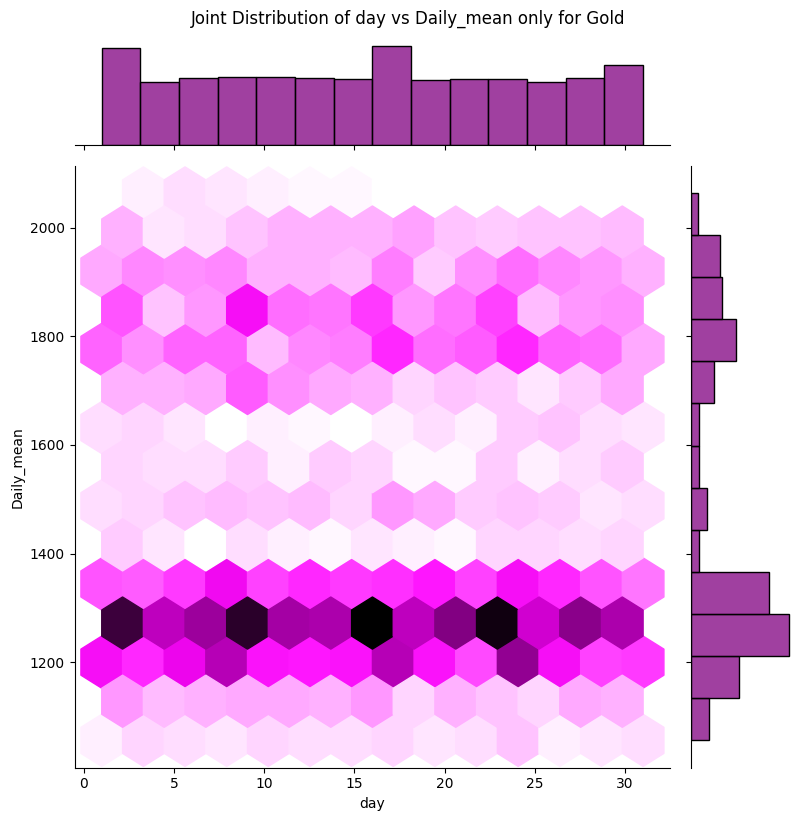

In [79]:
sns.jointplot(data=df[df['G/S']==1], x='day', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of day vs Daily_mean only for Gold', y=1.02)
plt.xlabel('day')
plt.ylabel('Daily_mean')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/202764735.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


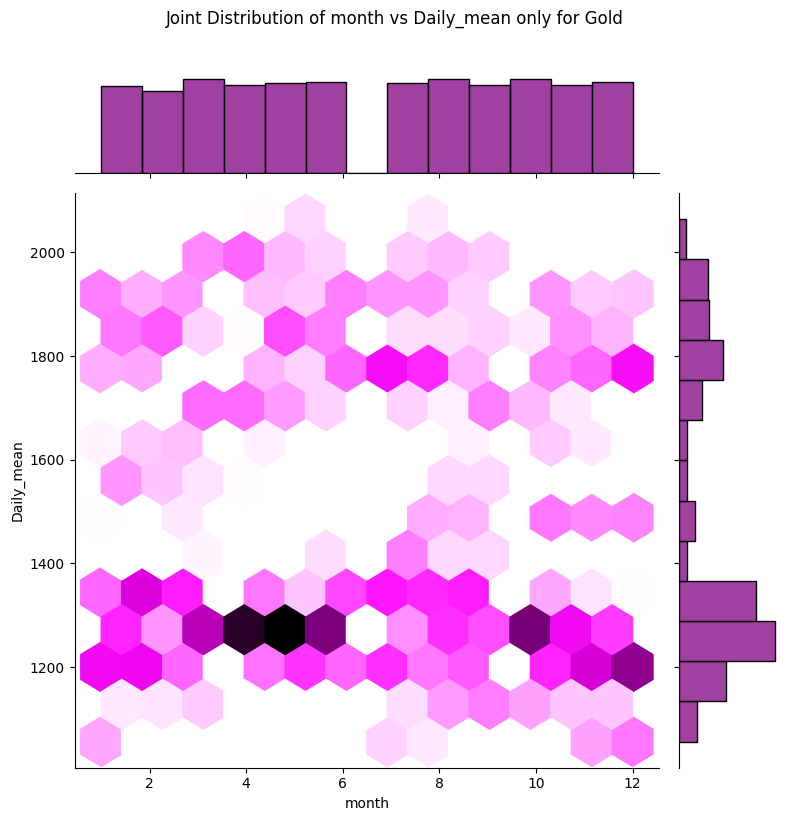

In [34]:
sns.jointplot(data=df[df['G/S']==1], x='month', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of month vs Daily_mean only for Gold', y=1.02)
plt.xlabel('month')
plt.ylabel('Daily_mean')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/2511679768.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


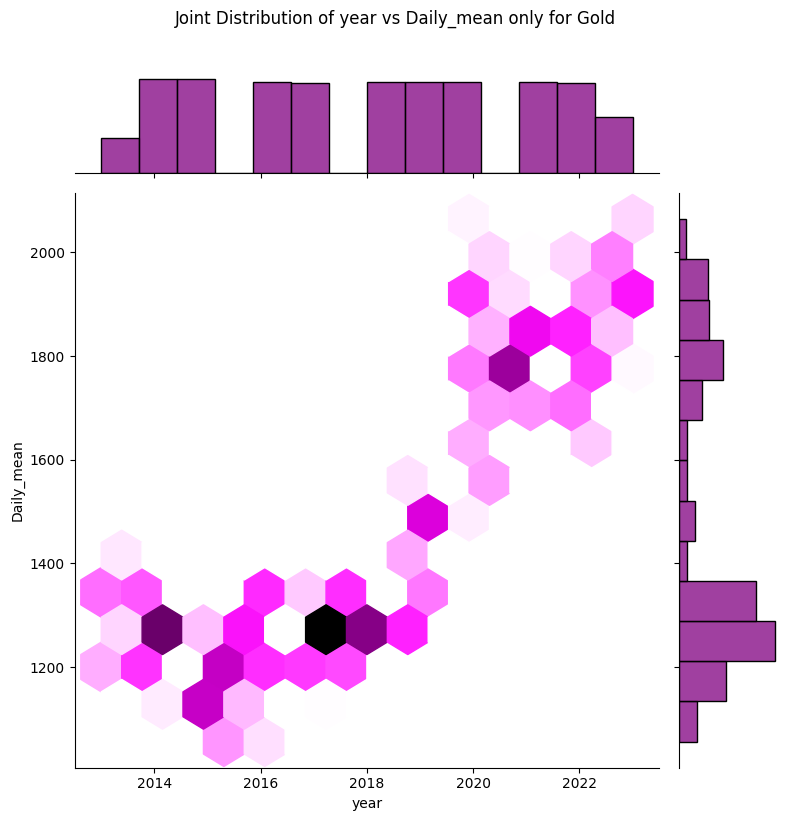

In [35]:
sns.jointplot(data=df[df['G/S']==1], x='year', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of year vs Daily_mean only for Gold', y=1.02)
plt.xlabel('year')
plt.ylabel('Daily_mean')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/3306408427.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


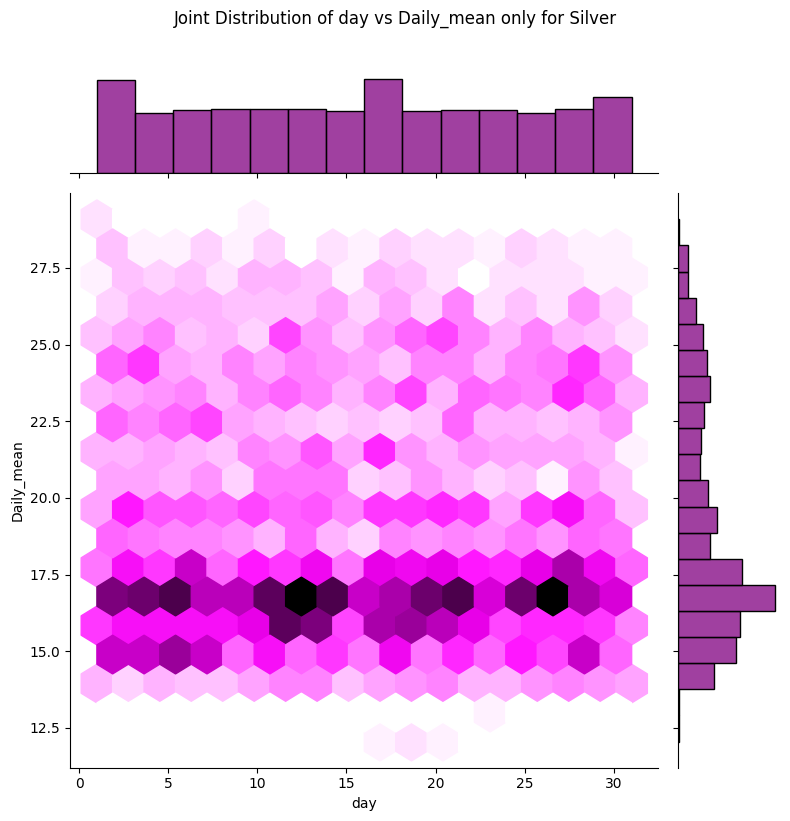

In [36]:
sns.jointplot(data=df[df['G/S']==0], x='day', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of day vs Daily_mean only for Silver', y=1.02)
plt.xlabel('day')
plt.ylabel('Daily_mean')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/3288296951.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


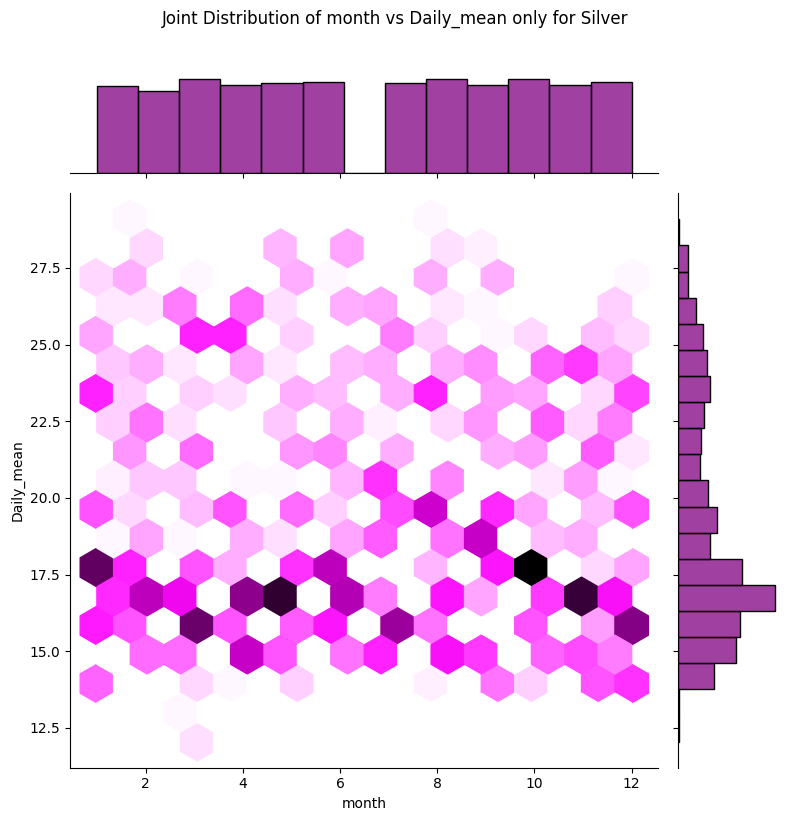

In [37]:
sns.jointplot(data=df[df['G/S']==0], x='month', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of month vs Daily_mean only for Silver', y=1.02)
plt.xlabel('month')
plt.ylabel('Daily_mean')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/3395545408.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


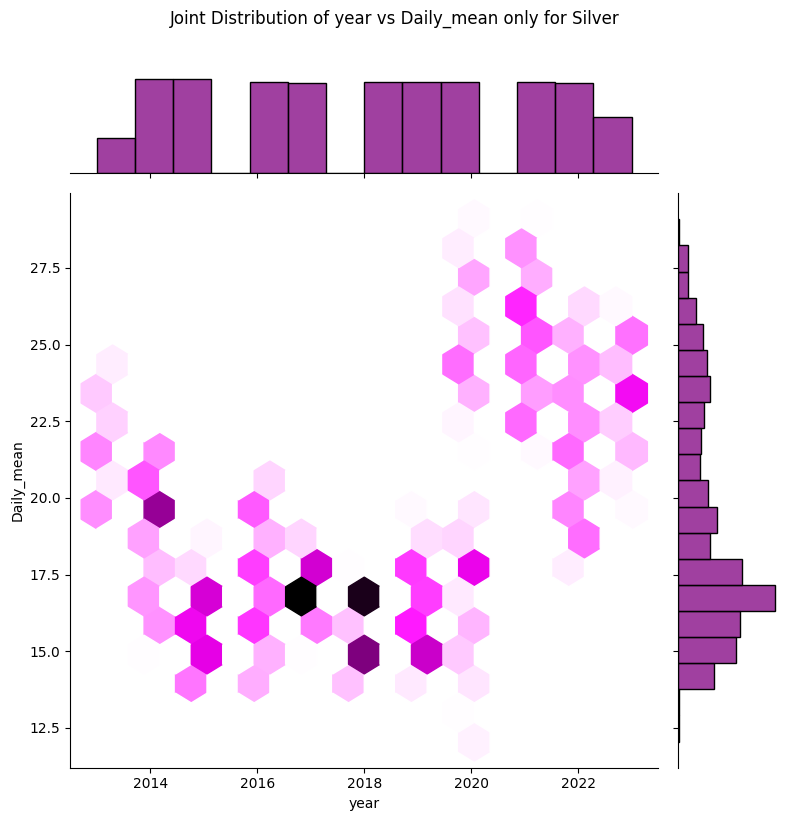

In [38]:
sns.jointplot(data=df[df['G/S']==0], x='year', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of year vs Daily_mean only for Silver', y=1.02)
plt.xlabel('year')
plt.ylabel('Daily_mean')
plt.tight_layout()
plt.show()

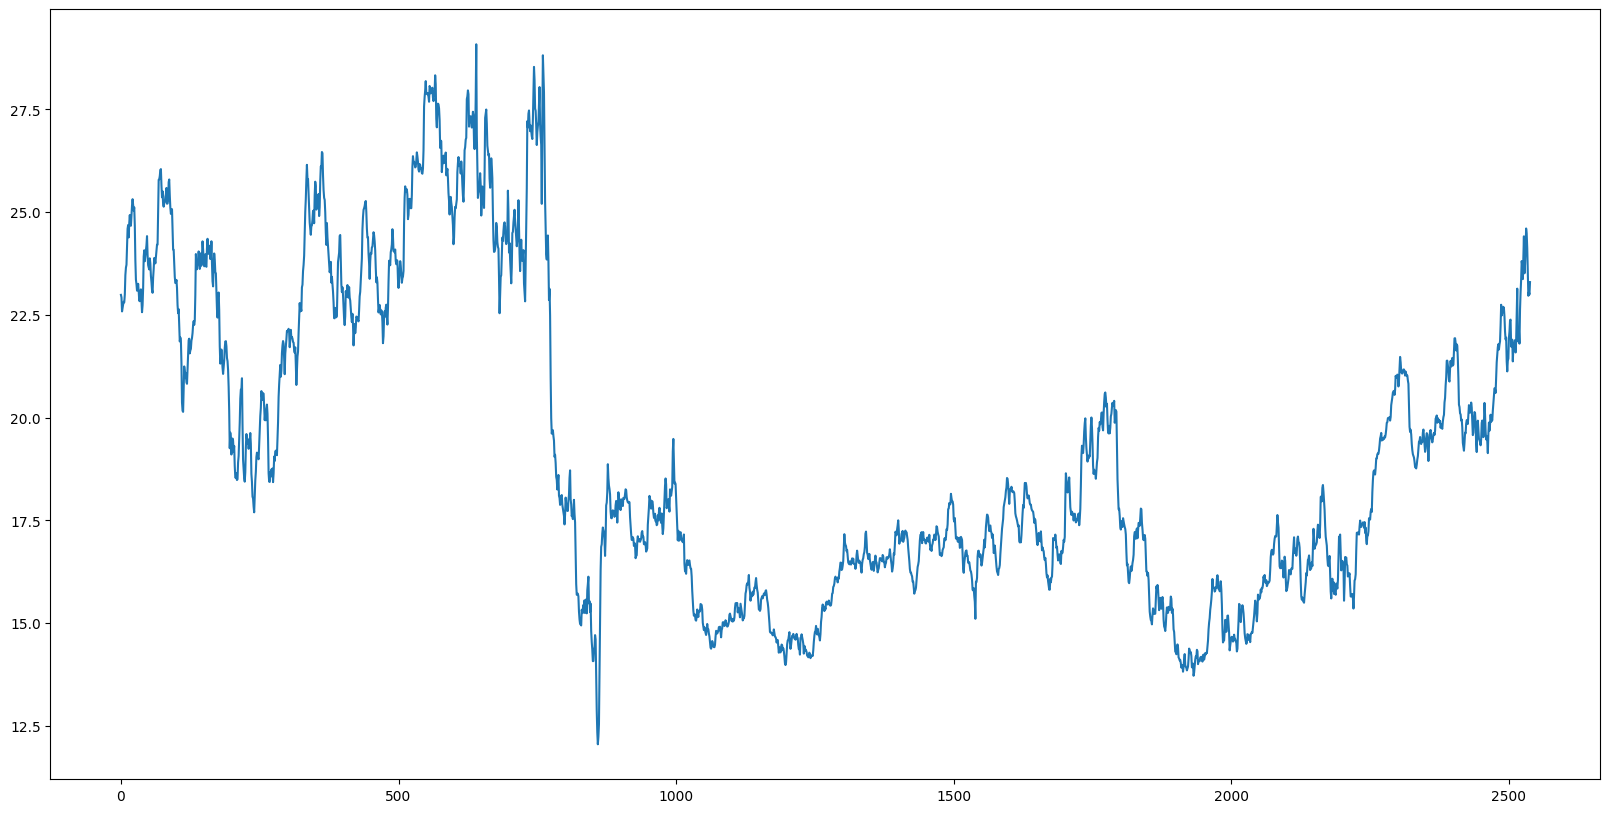

In [39]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['mean daily value'])

Text(0.5, 1.0, 'max value of silver')

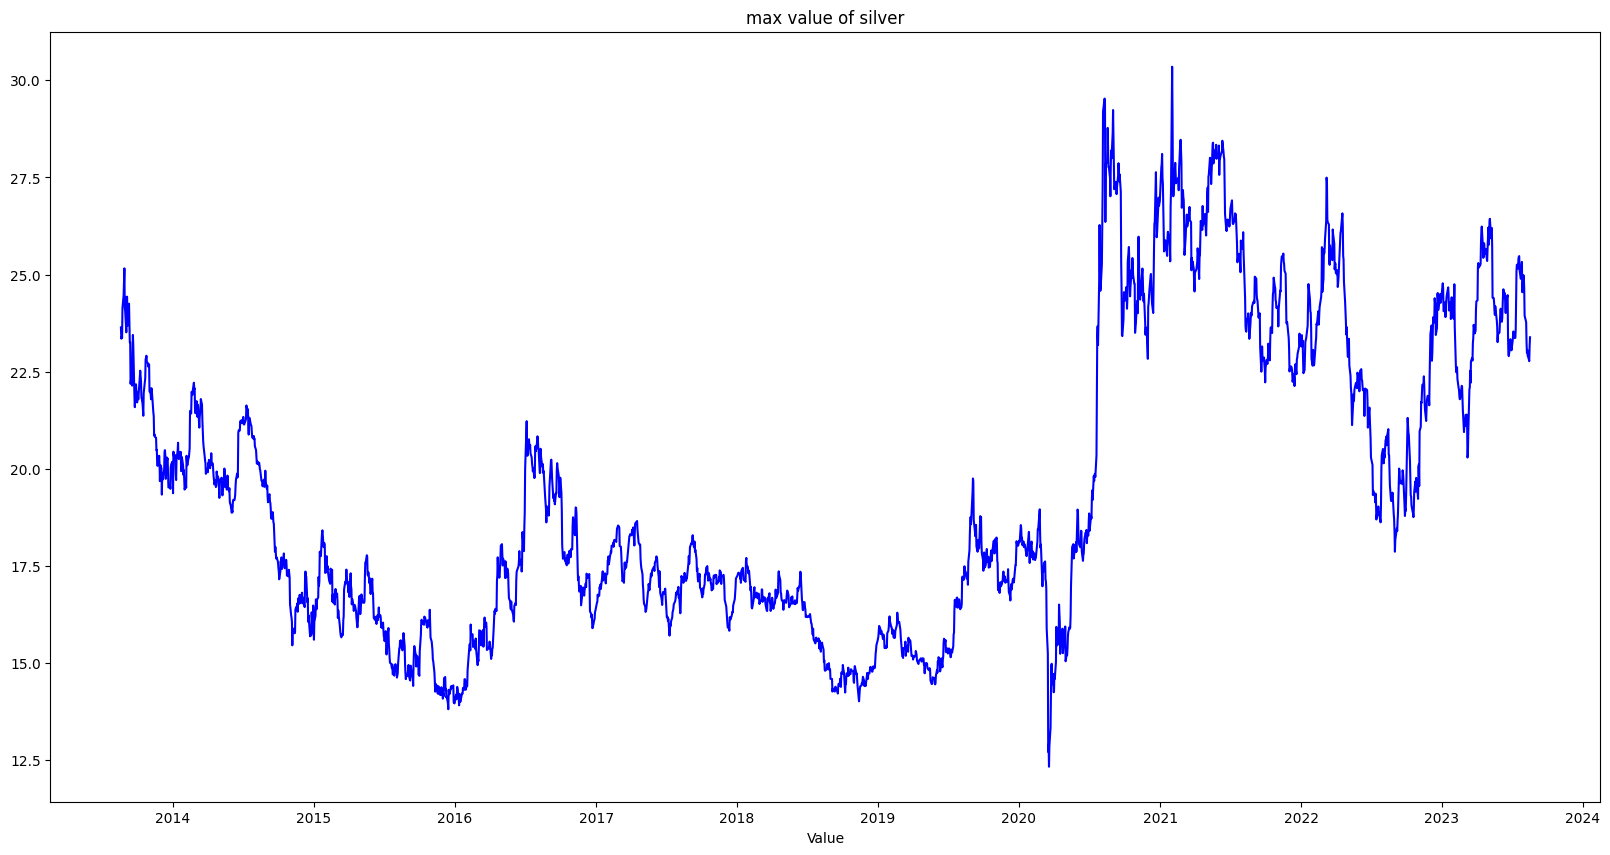

In [40]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['High'], color = 'blue')
plt.xlabel('Value')
plt.title('max value of silver')

Text(0.5, 1.0, 'max value of Gold')

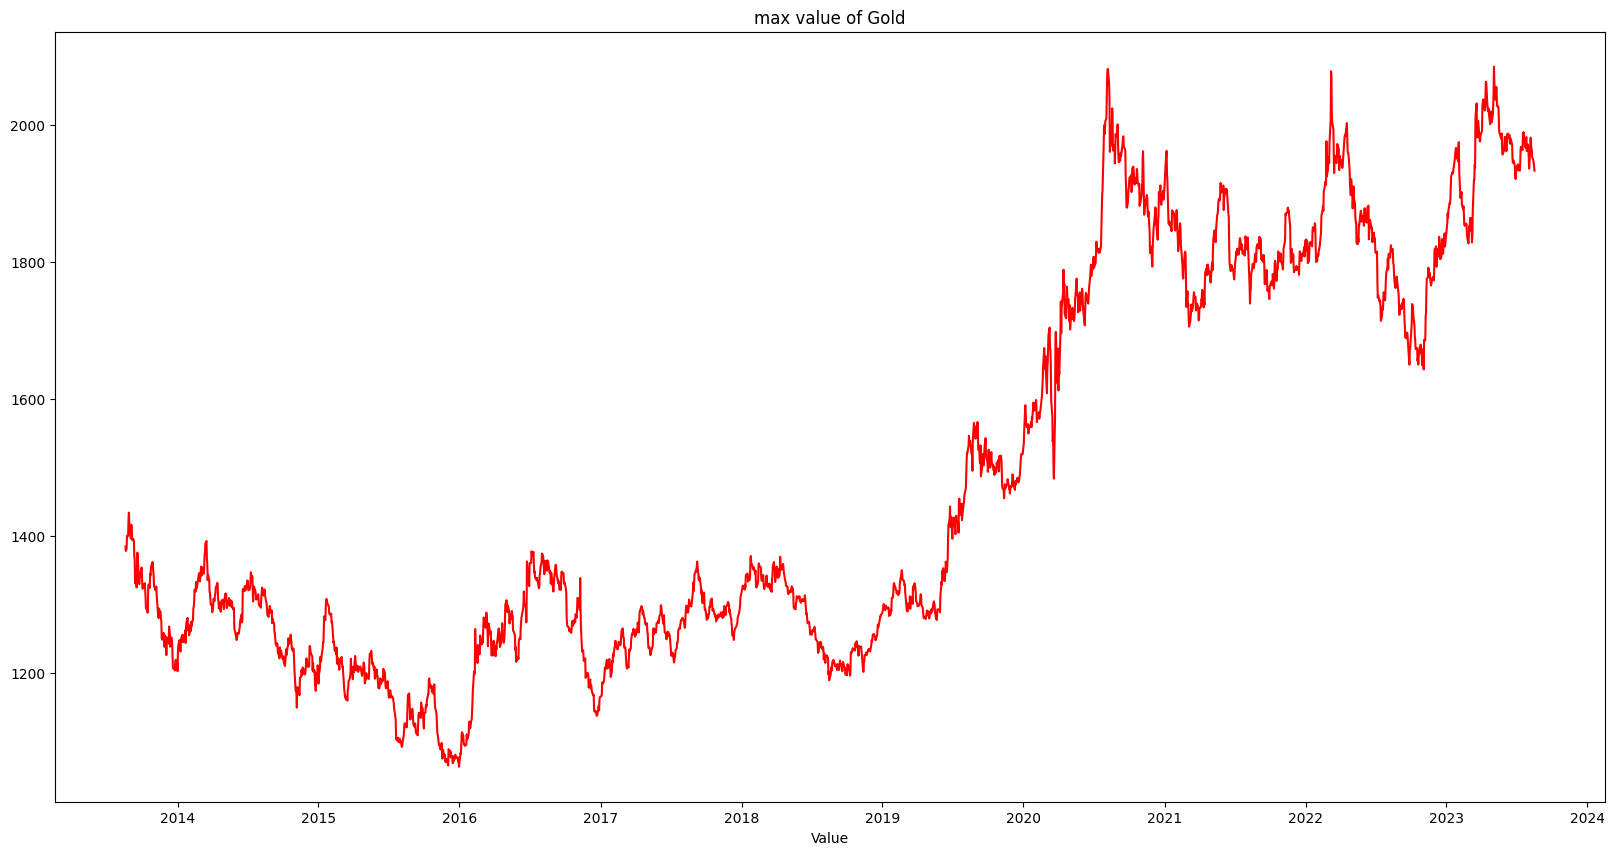

In [41]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['High'], color = 'red')
plt.xlabel('Value')
plt.title('max value of Gold')

Text(0.5, 1.0, 'Min value of Silver')

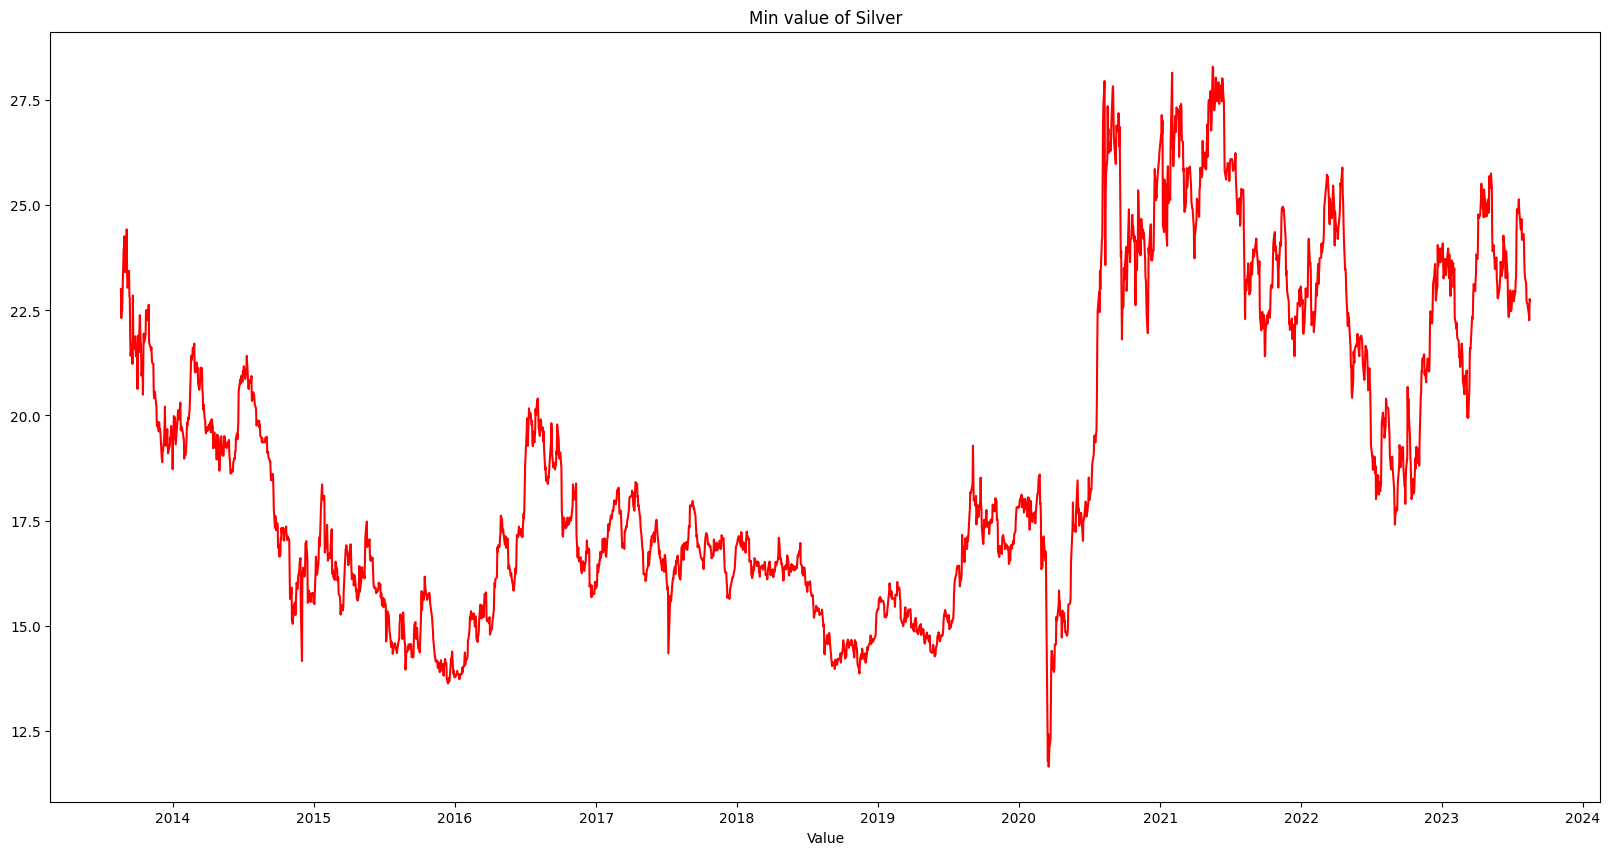

In [42]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['Low'], color = 'red')
plt.xlabel('Value')
plt.title('Min value of Silver')

Text(0.5, 1.0, 'min value of Gold')

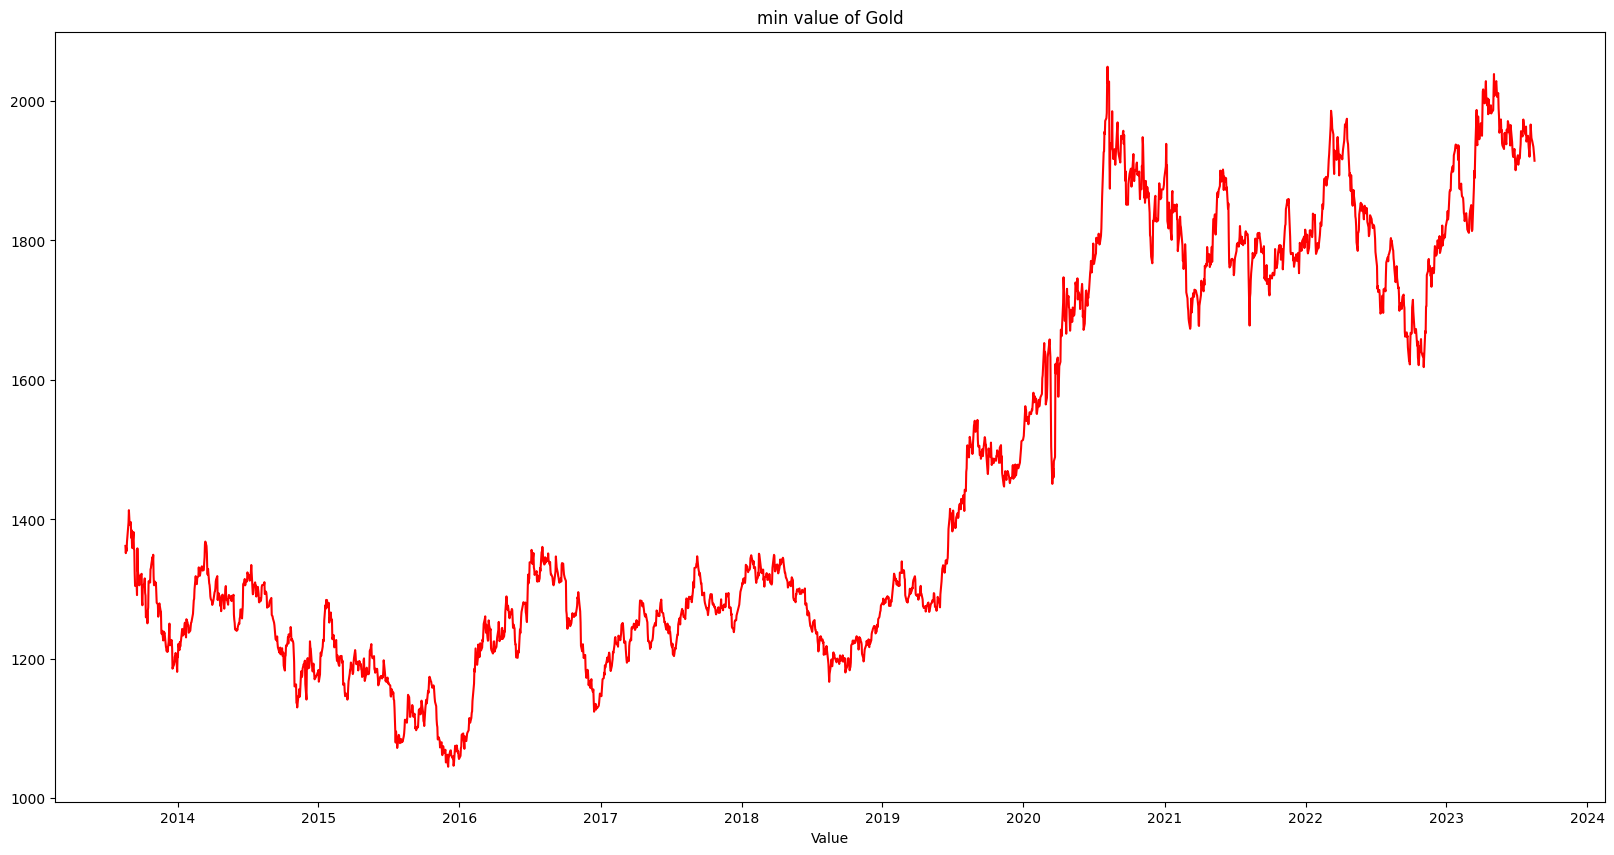

In [43]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['Low'], color = 'red')
plt.xlabel('Value')
plt.title('min value of Gold')

Text(0.5, 1.0, 'Silver Price')

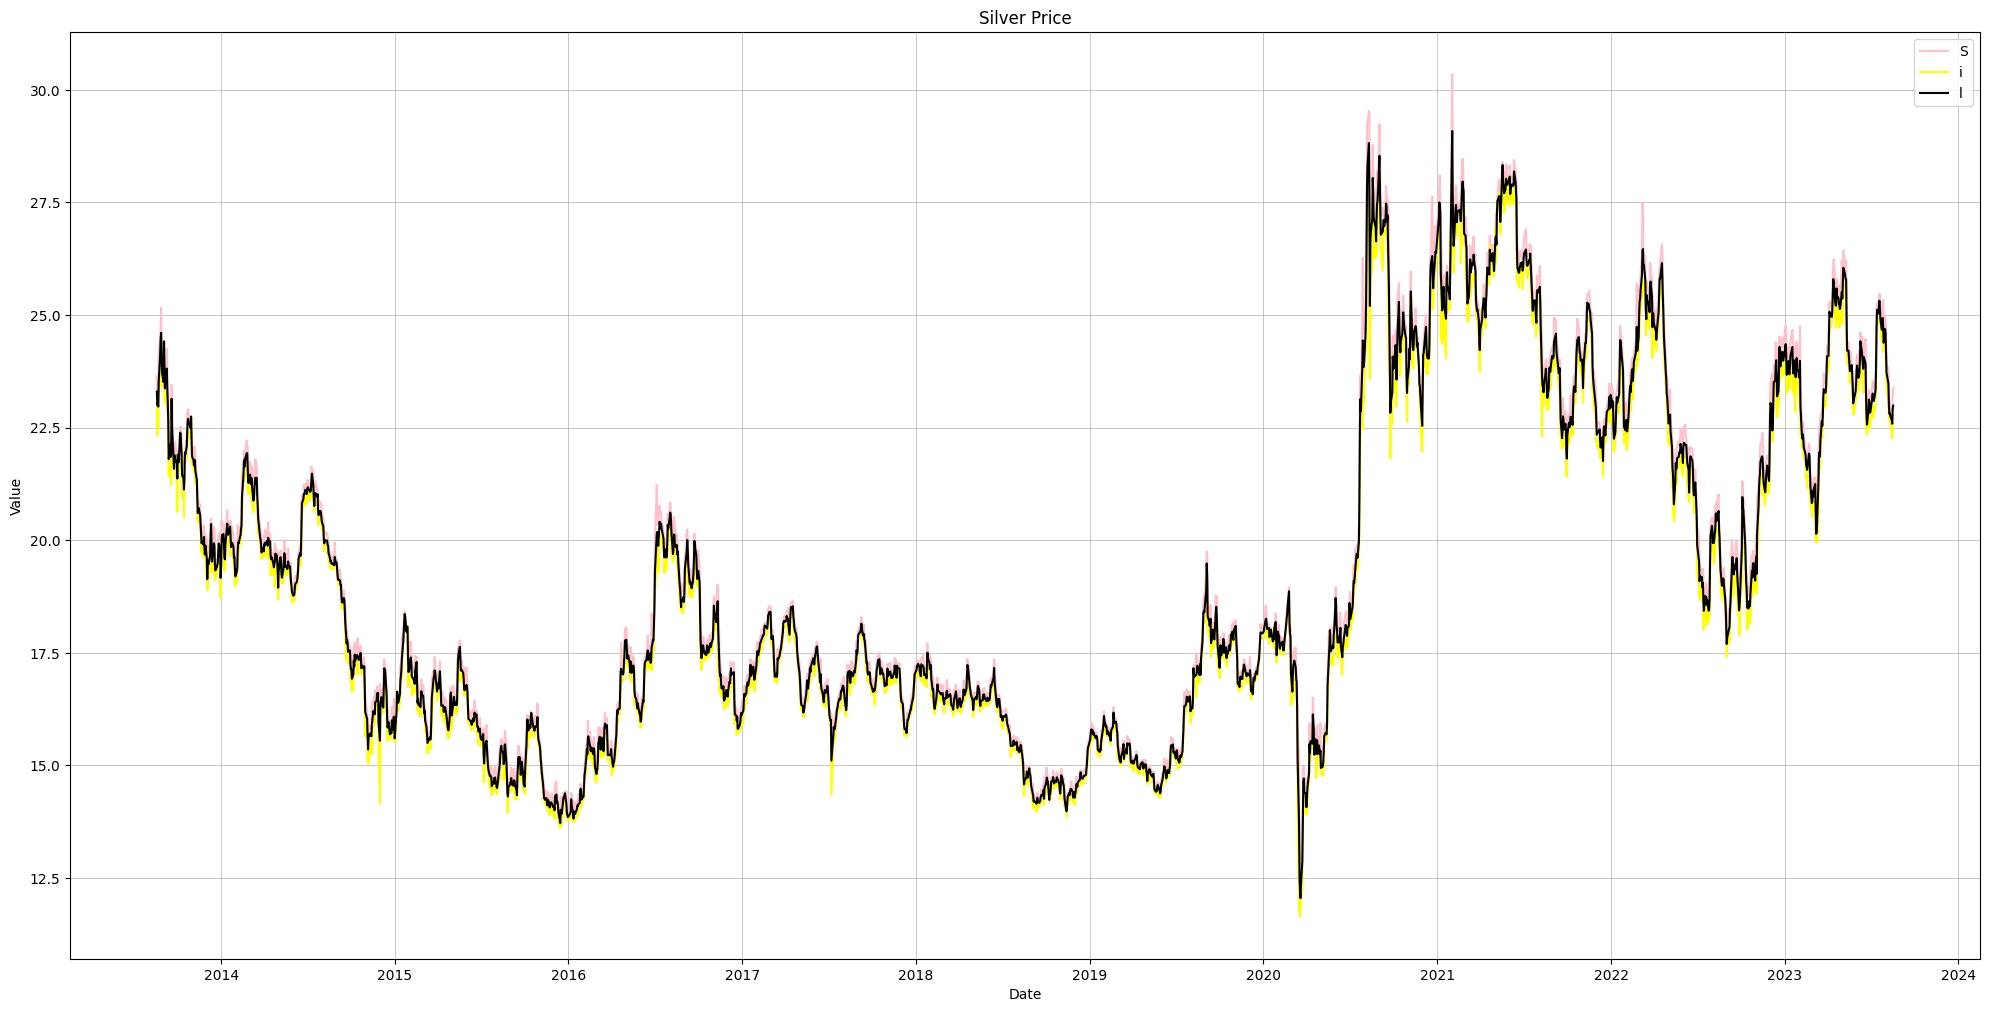

In [44]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['High'], color = 'pink')
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['Low'], color = 'yellow')
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['mean daily value'], color = 'black')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, linewidth=0.5)
plt.tight_layout()
plt.legend('Silver price')
plt.title('Silver Price')

Text(0.5, 1.0, 'Gold Price')

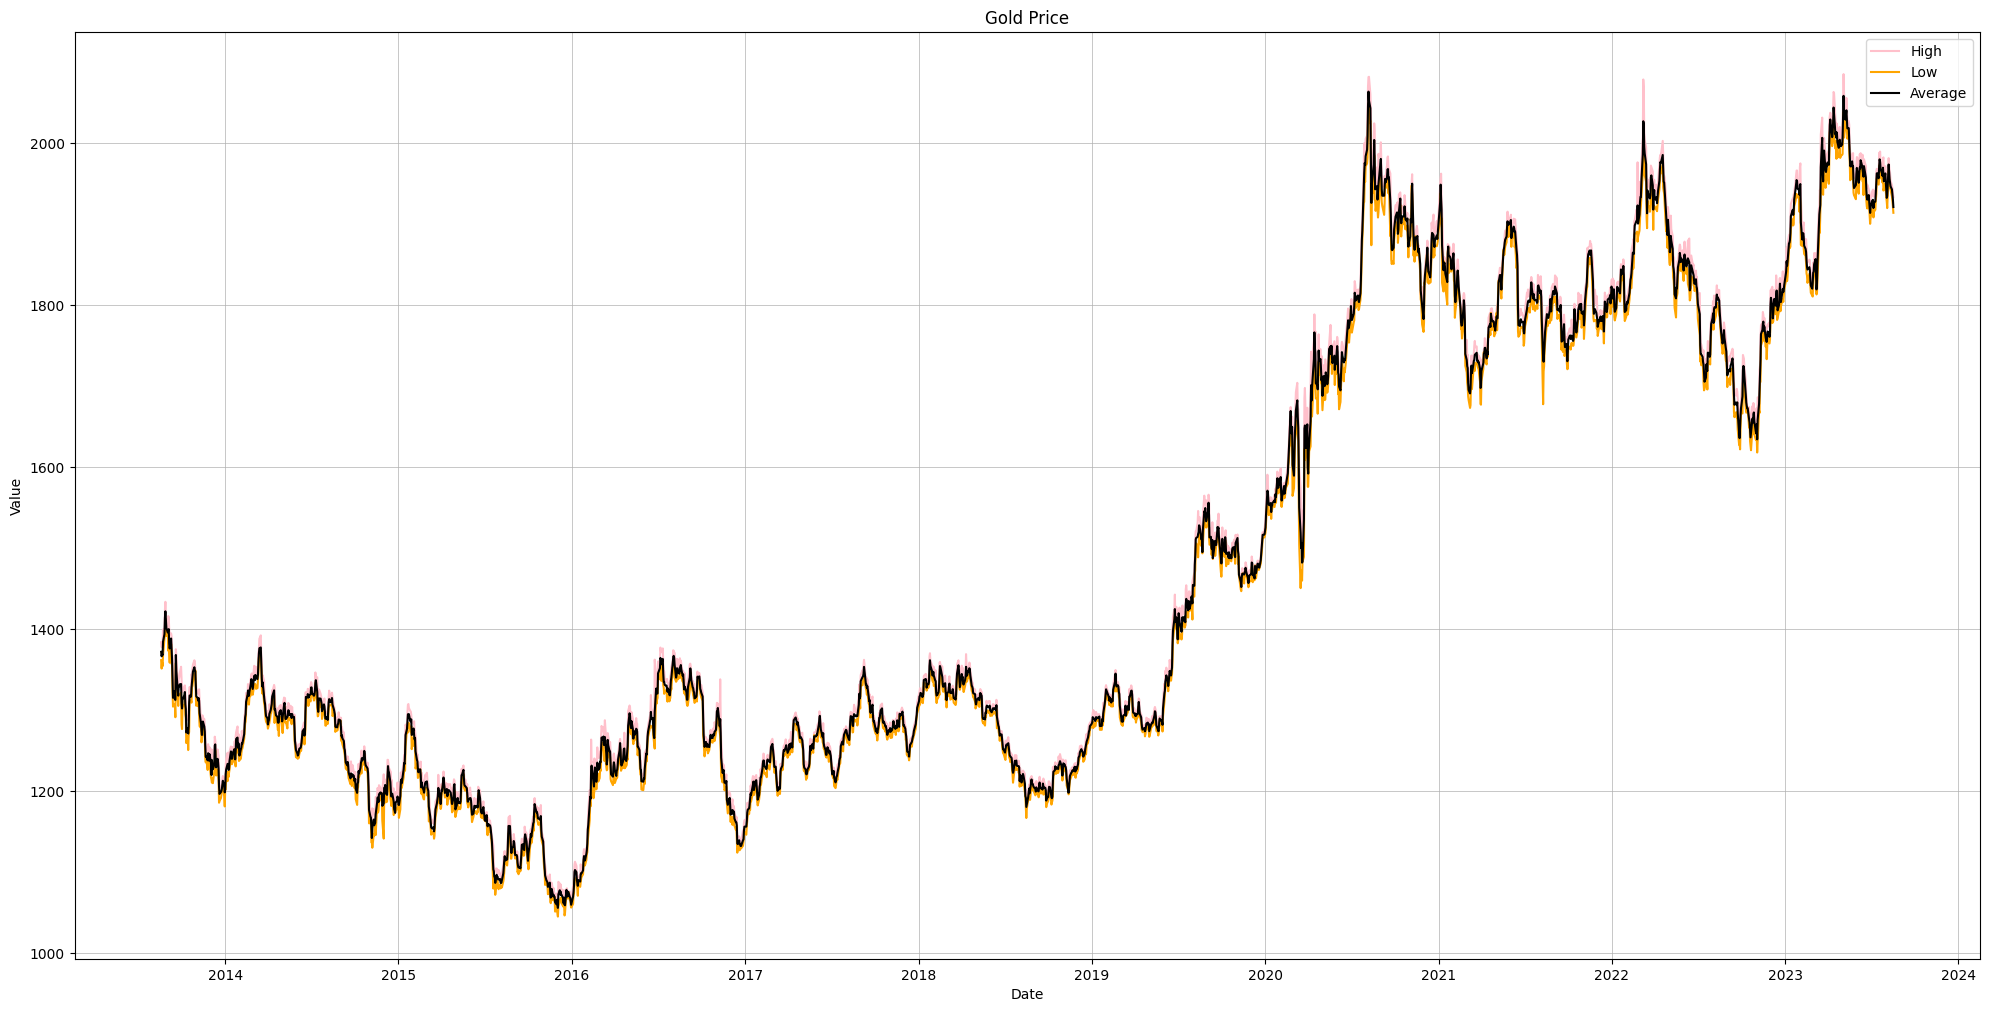

In [46]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['High'], color = 'pink')
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['Low'], color = 'orange')
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['mean daily value'], color = 'black')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, linewidth=0.5)
plt.tight_layout()
plt.legend(["High","Low","Average"])
plt.title('Gold Price')

Text(0.5, 1.0, 'Gold avergae Price')

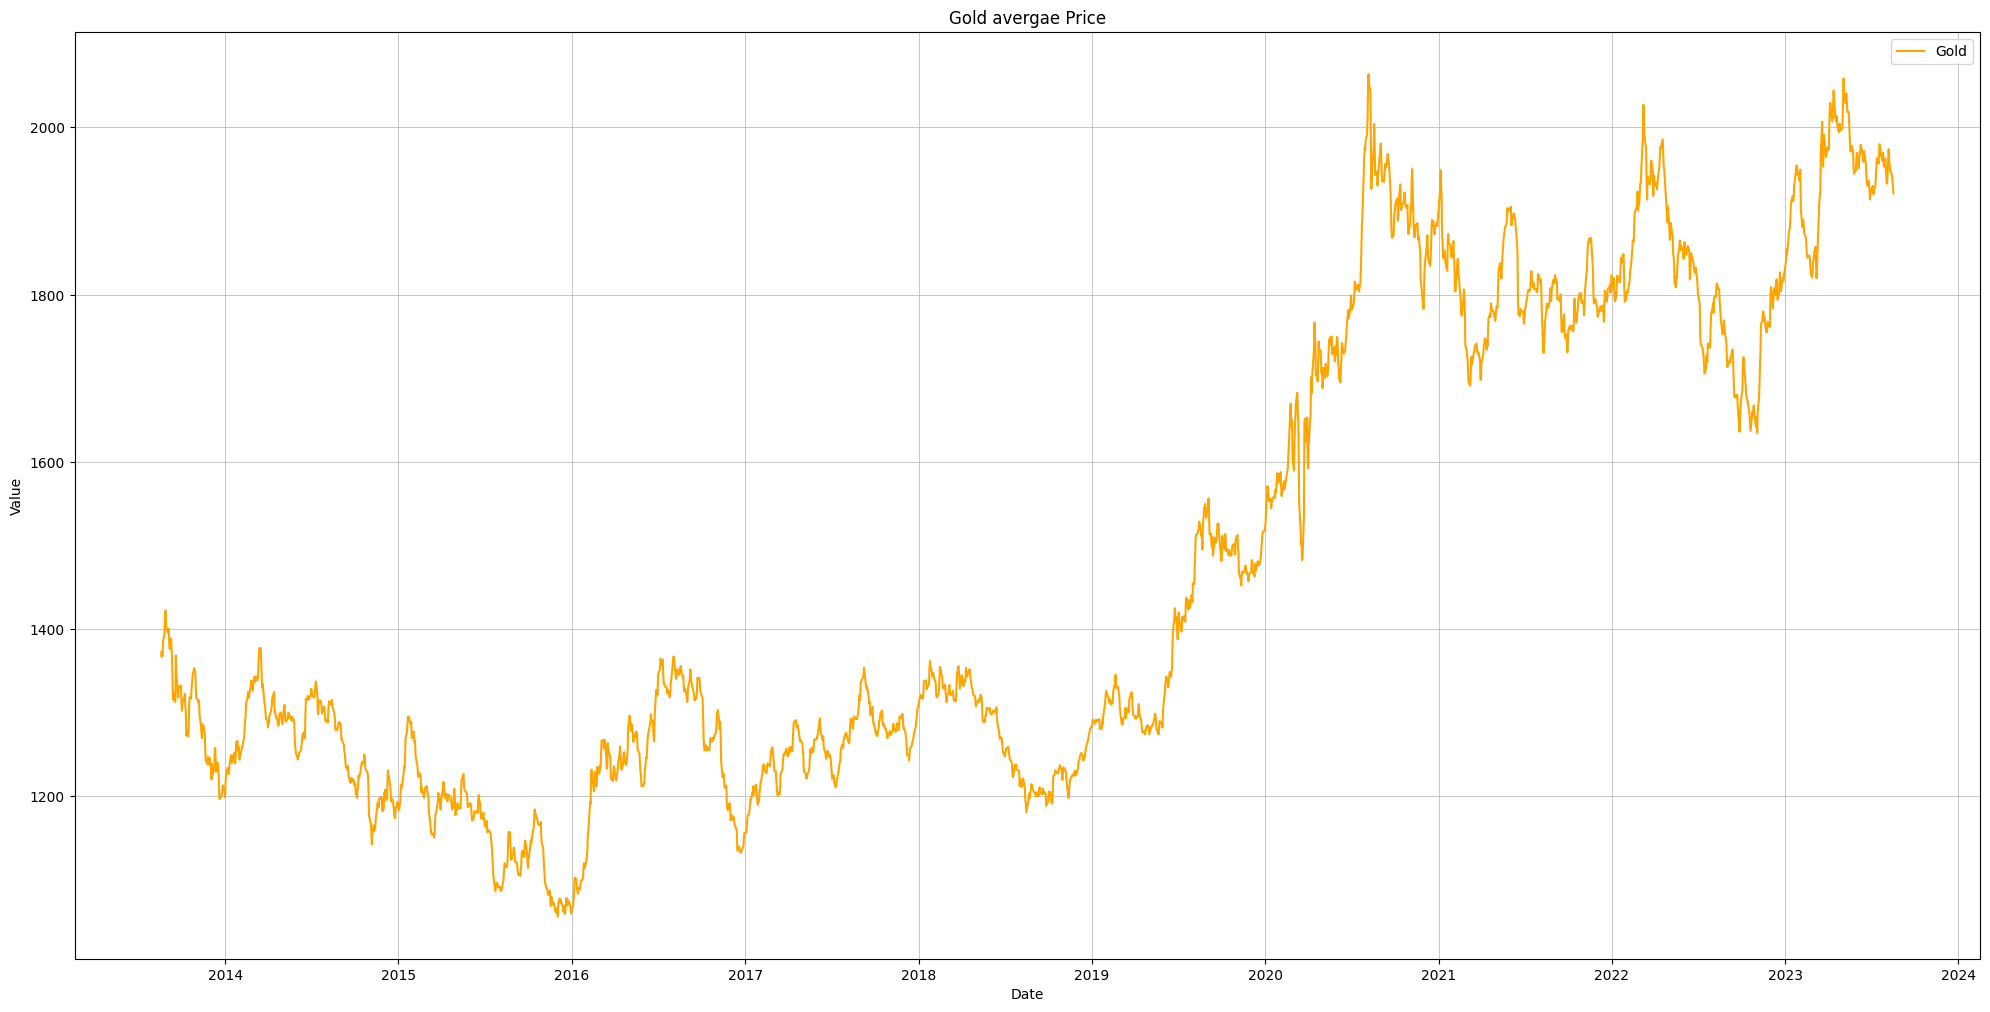

In [47]:
plt.figure(figsize=(20,10))
#plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['mean daily value'], color = 'black')
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['mean daily value'], color = 'orange')
#plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['mean daily value'], color = 'black')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, linewidth=0.5)
plt.tight_layout()
plt.legend(["Gold"])
plt.title('Gold avergae Price')

Text(0.5, 1.0, 'Average Silver Price')

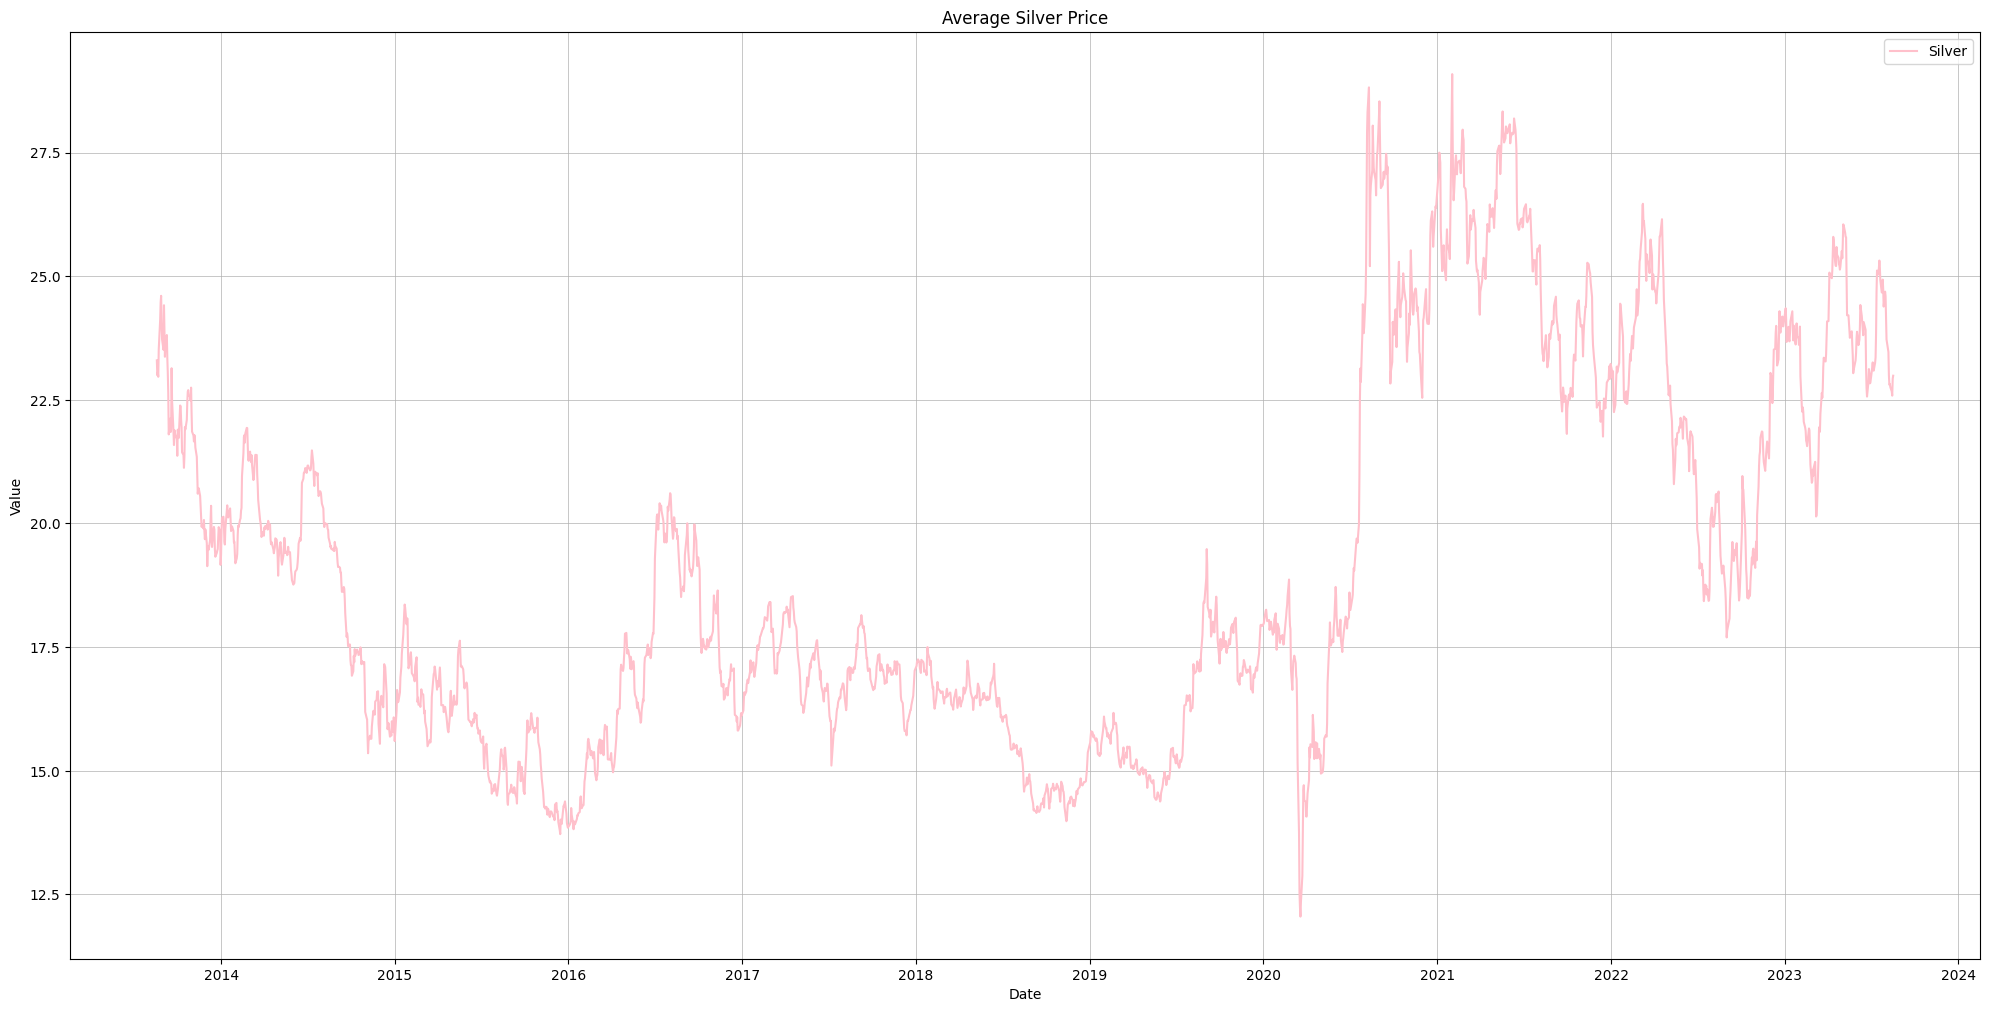

In [48]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['mean daily value'], color = 'pink')
#plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['mean daily value'], color = 'orange')
#plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['mean daily value'], color = 'black')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True, linewidth=0.5)
plt.tight_layout()
plt.legend(["Silver"])
plt.title('Average Silver Price')

Text(0.5, 1.0, 'year vs price difference for the day for silver')

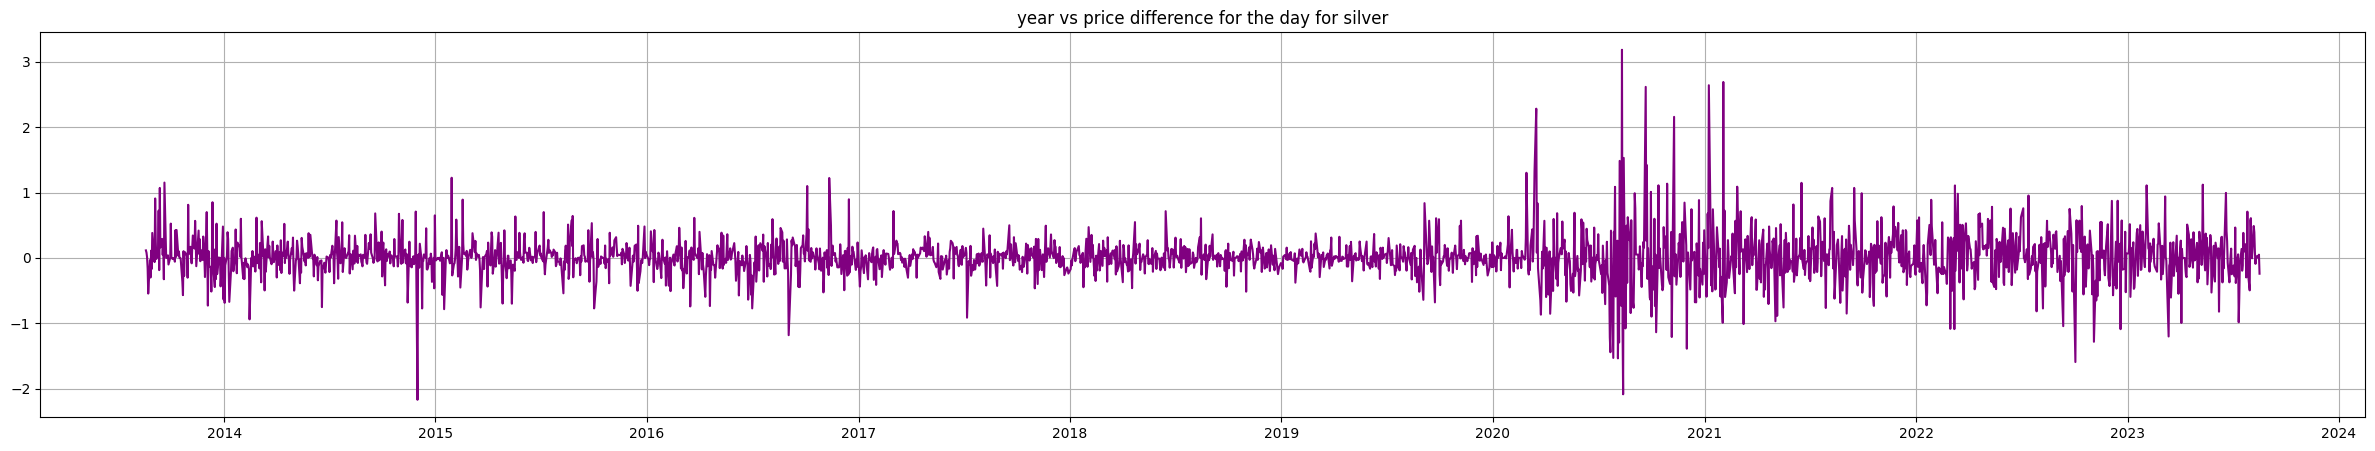

In [64]:
plt.figure(figsize=(30,5))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['Price Difference'], color='purple')
plt.grid(True)
plt.title('year vs price difference for the day for silver')

Text(0.5, 1.0, 'year vs price difference for the day for gold')

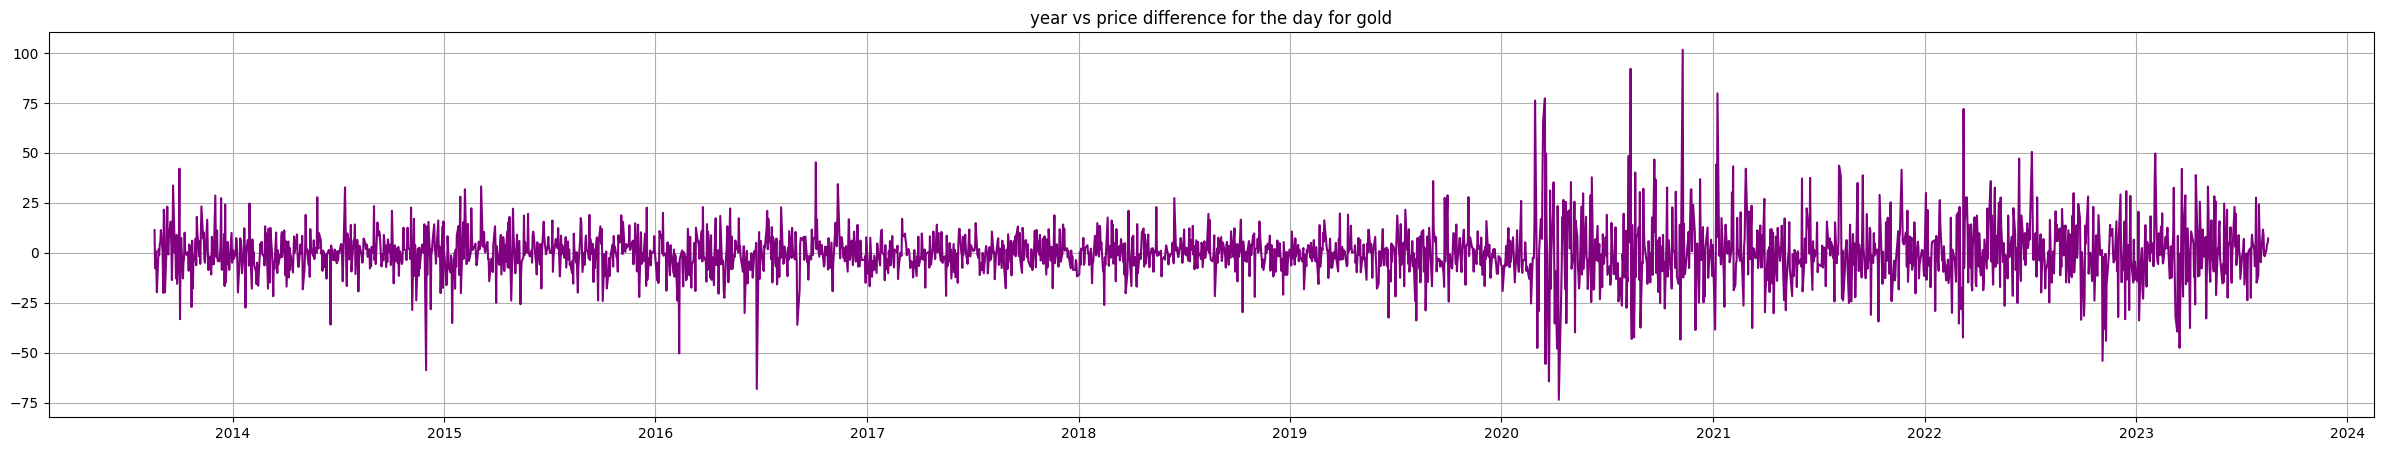

In [63]:
plt.figure(figsize=(30,5))
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['Price Difference'], color='purple')
plt.grid(True)
plt.title('year vs price difference for the day for gold')

Text(0.5, 1.0, 'opening price of Gold')

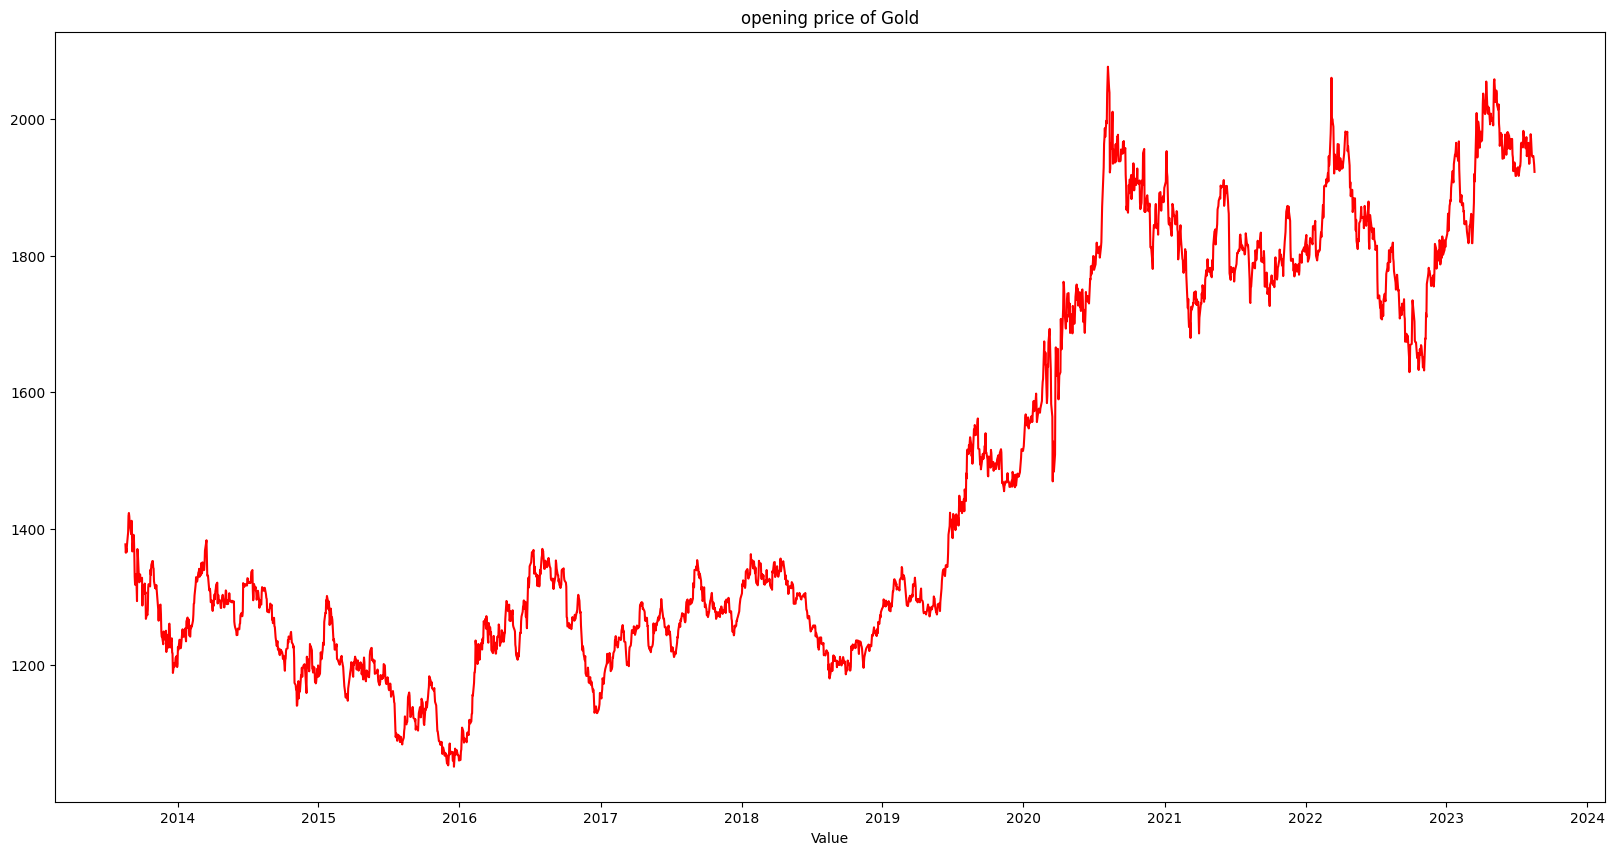

In [51]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['Open'], color = 'red')
plt.xlabel('Value')
plt.title('opening price of Gold')

Text(0.5, 1.0, 'closing price of Gold')

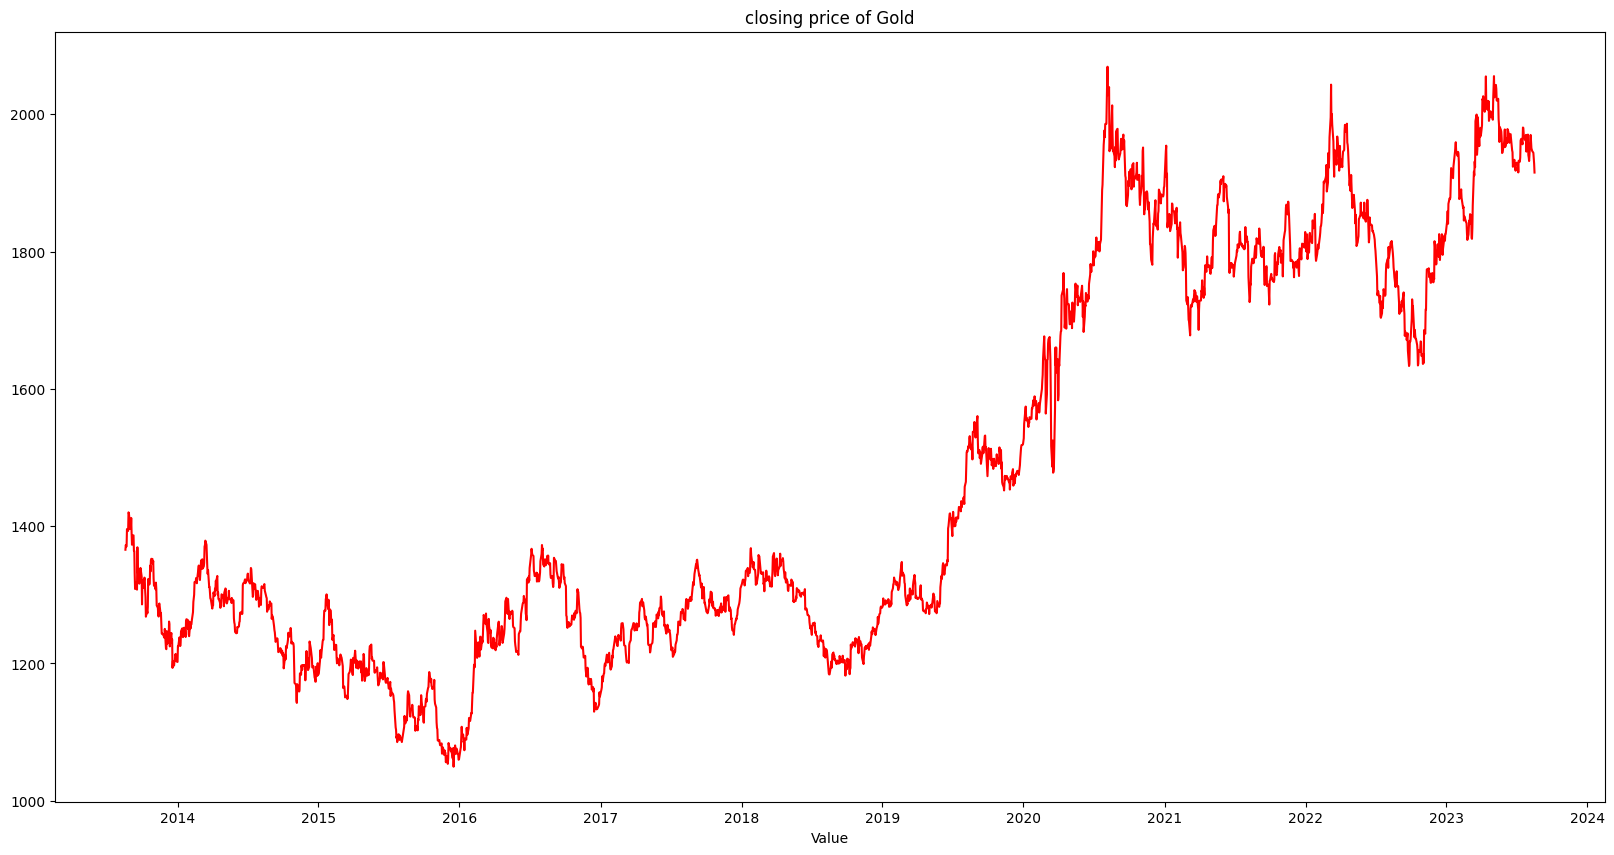

In [52]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['Close/Last'], color = 'red')
plt.xlabel('Value')
plt.title('closing price of Gold')

Text(0.5, 1.0, 'opening price of silver')

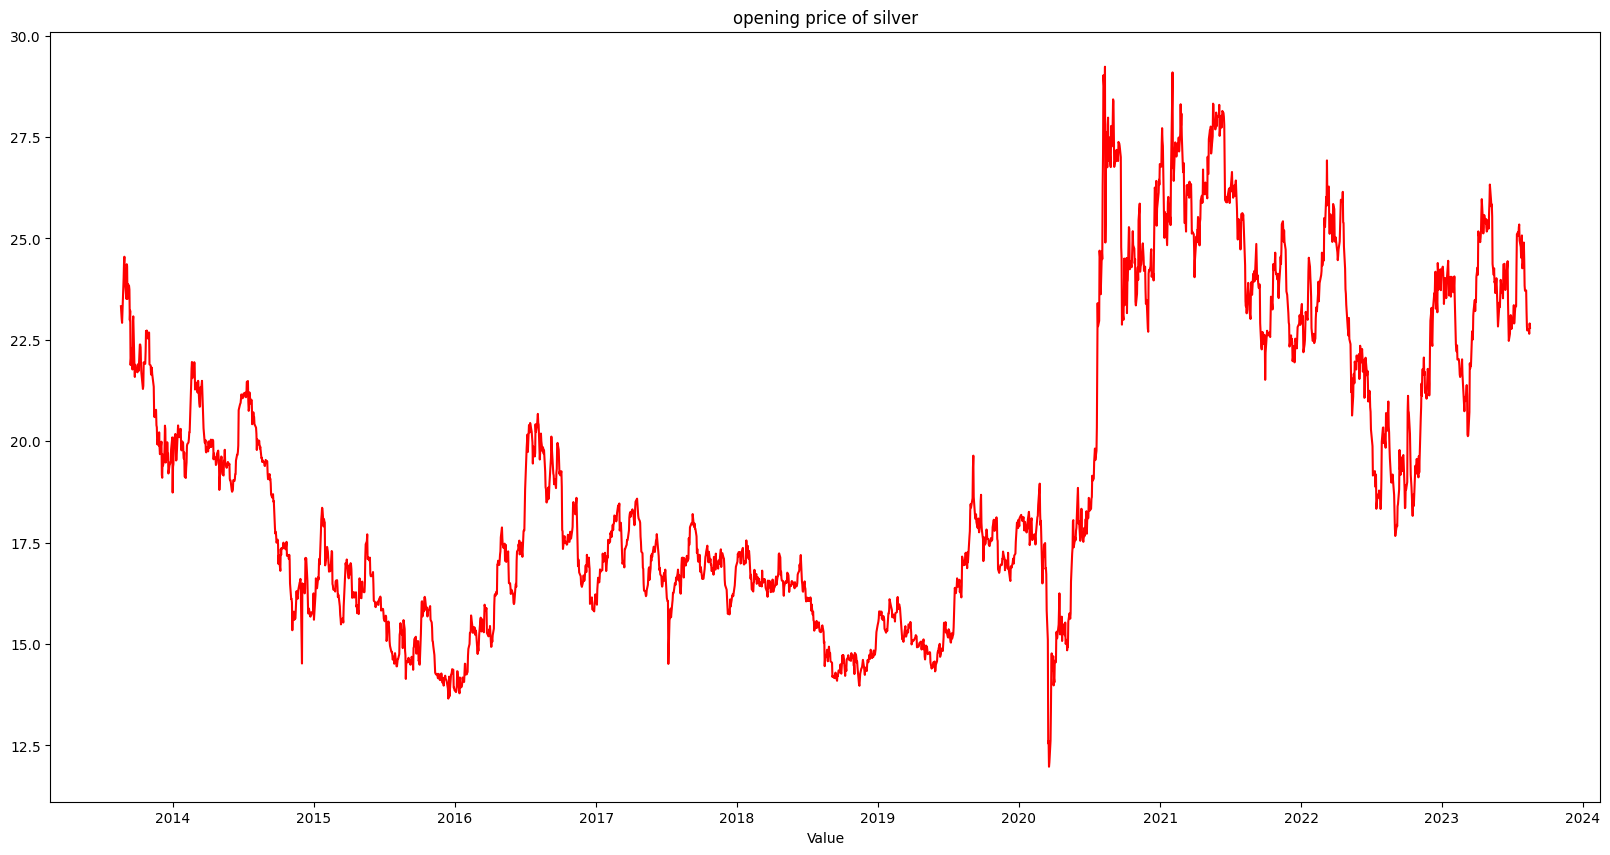

In [53]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['Open'], color = 'red')
plt.xlabel('Value')
plt.title('opening price of silver')

Text(0.5, 1.0, 'closing price of silver')

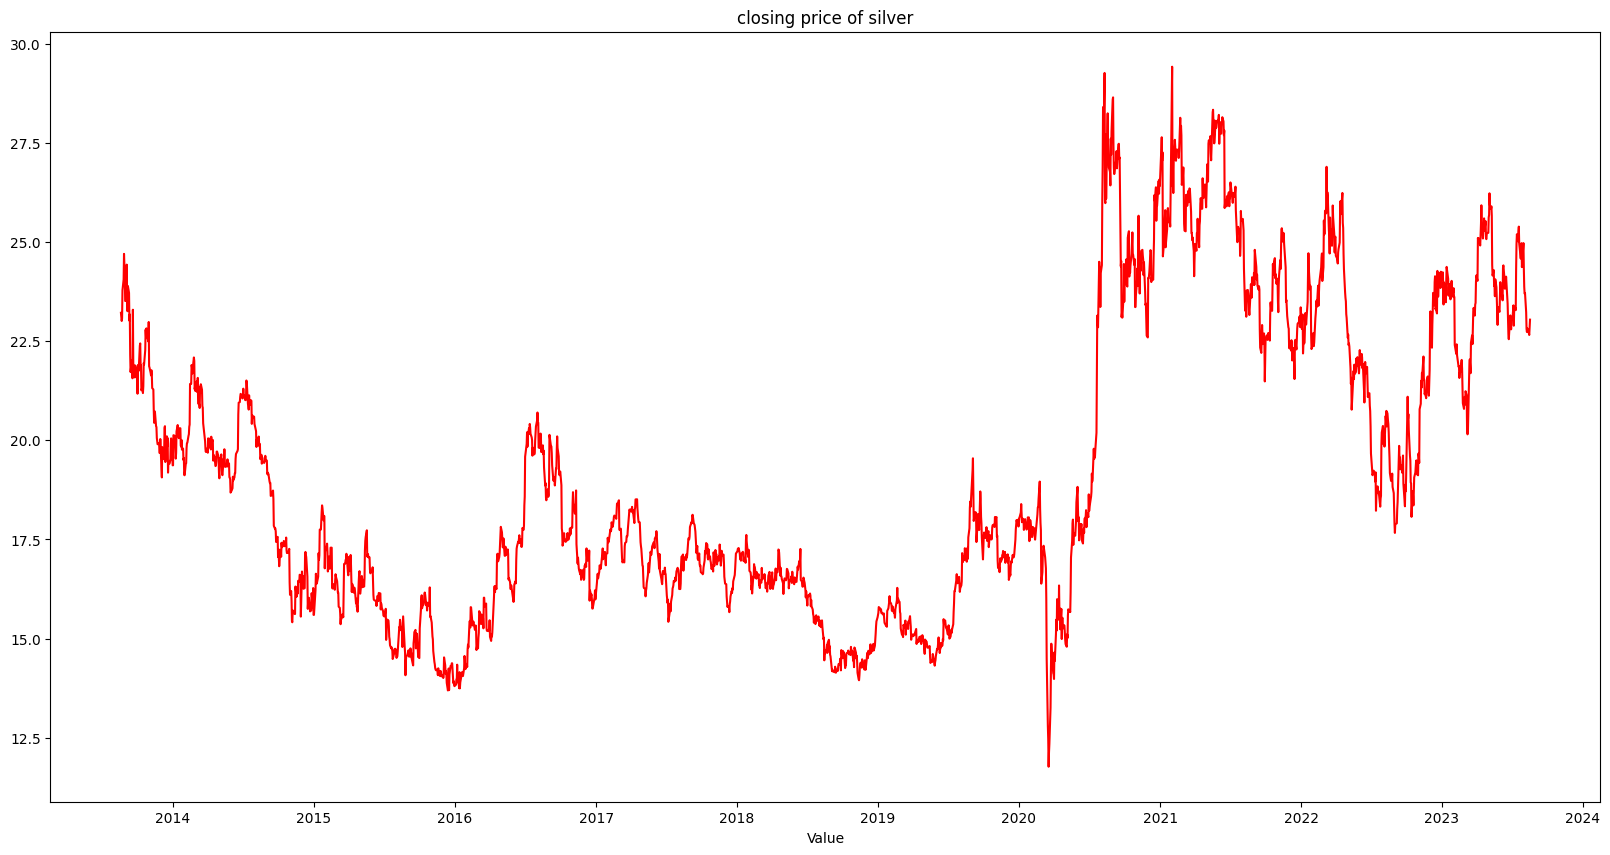

In [54]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['Close/Last'], color = 'red')
plt.xlabel('Value')
plt.title('closing price of silver')

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/2406775222.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


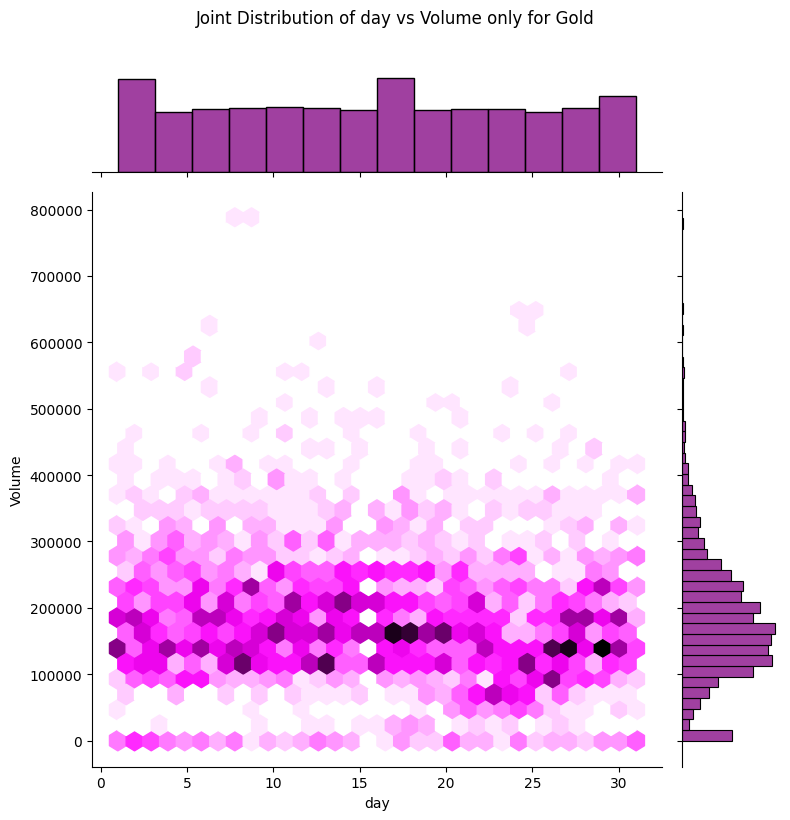

In [55]:
sns.jointplot(data=df[df['G/S']==1], x='day', y='Volume', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of day vs Volume only for Gold', y=1.02)
plt.xlabel('day')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/3474330742.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


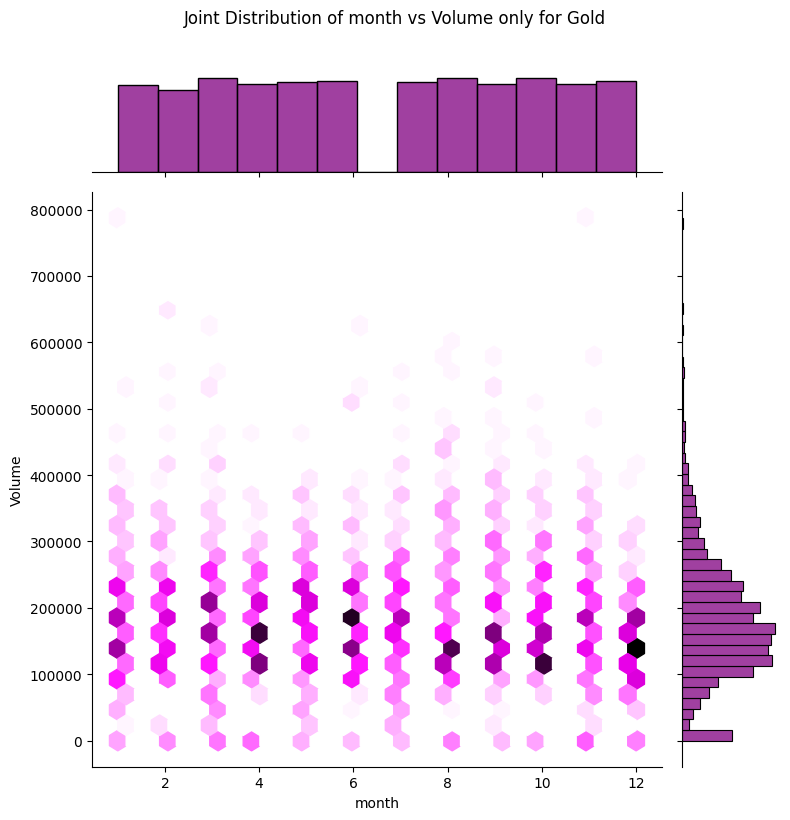

In [56]:
sns.jointplot(data=df[df['G/S']==1], x='month', y='Volume', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of month vs Volume only for Gold', y=1.02)
plt.xlabel('month')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/2119751823.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


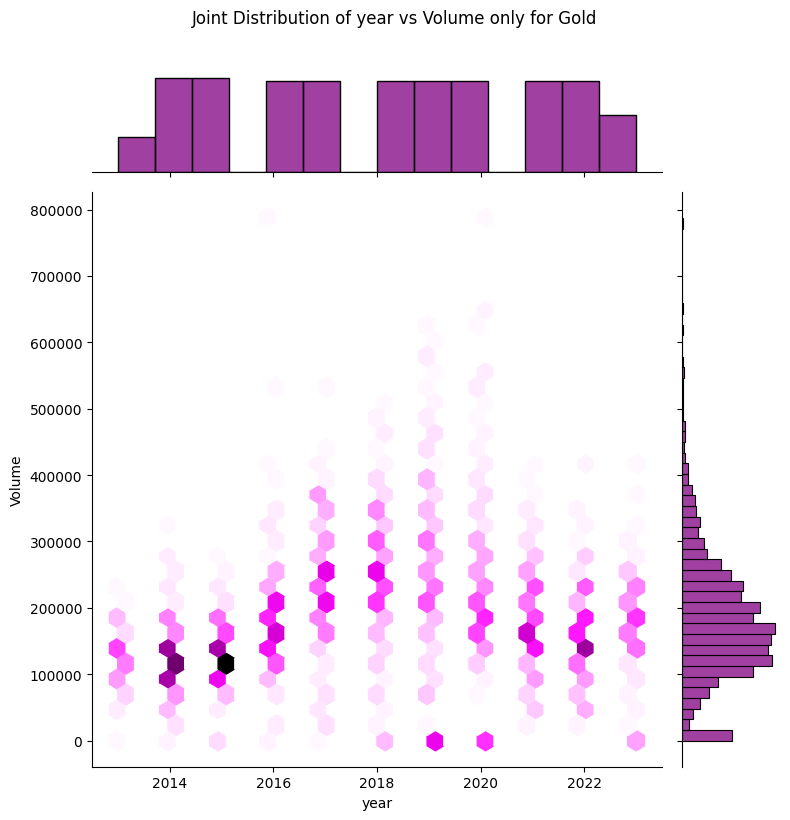

In [57]:
sns.jointplot(data=df[df['G/S']==1], x='year', y='Volume', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of year vs Volume only for Gold', y=1.02)
plt.xlabel('year')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/582800991.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


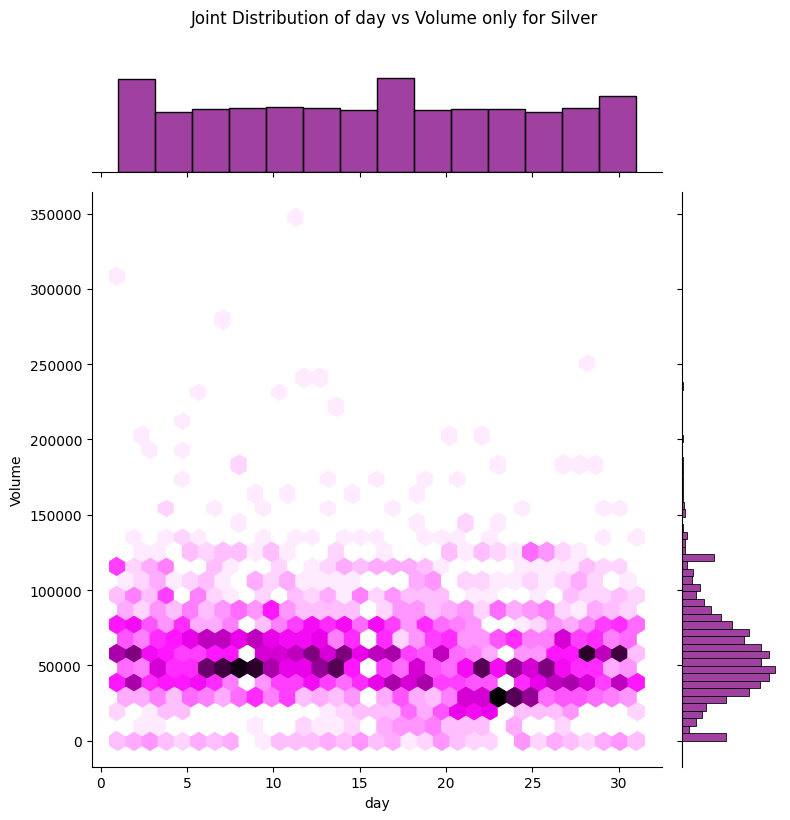

In [58]:
sns.jointplot(data=df[df['G/S']==0], x='day', y='Volume', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of day vs Volume only for Silver', y=1.02)
plt.xlabel('day')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/2699988566.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


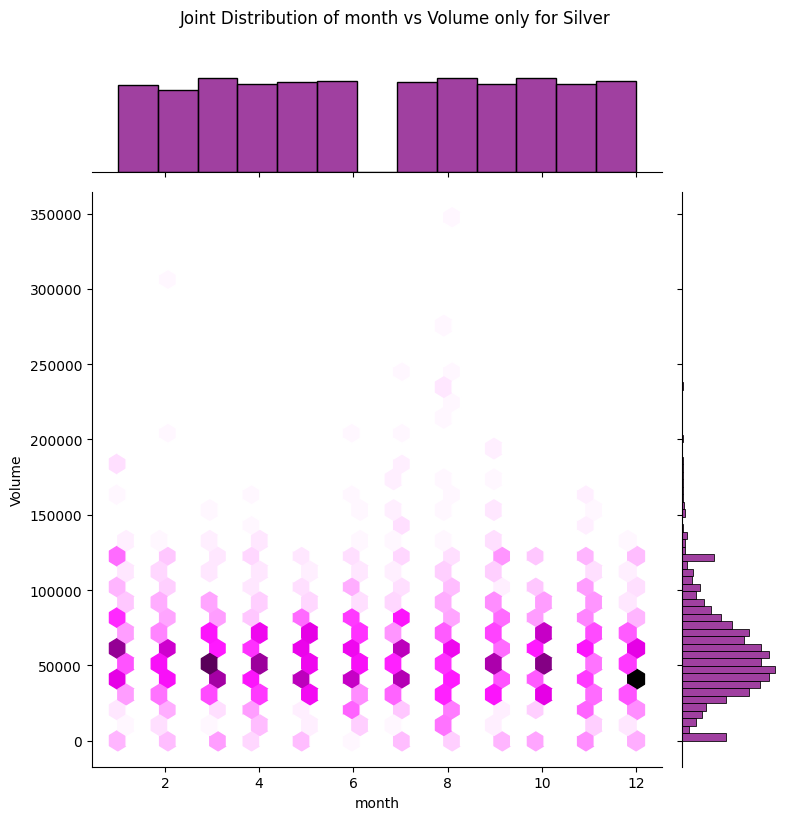

In [59]:
sns.jointplot(data=df[df['G/S']==0], x='month', y='Volume', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of month vs Volume only for Silver', y=1.02)
plt.xlabel('month')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/441748353.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


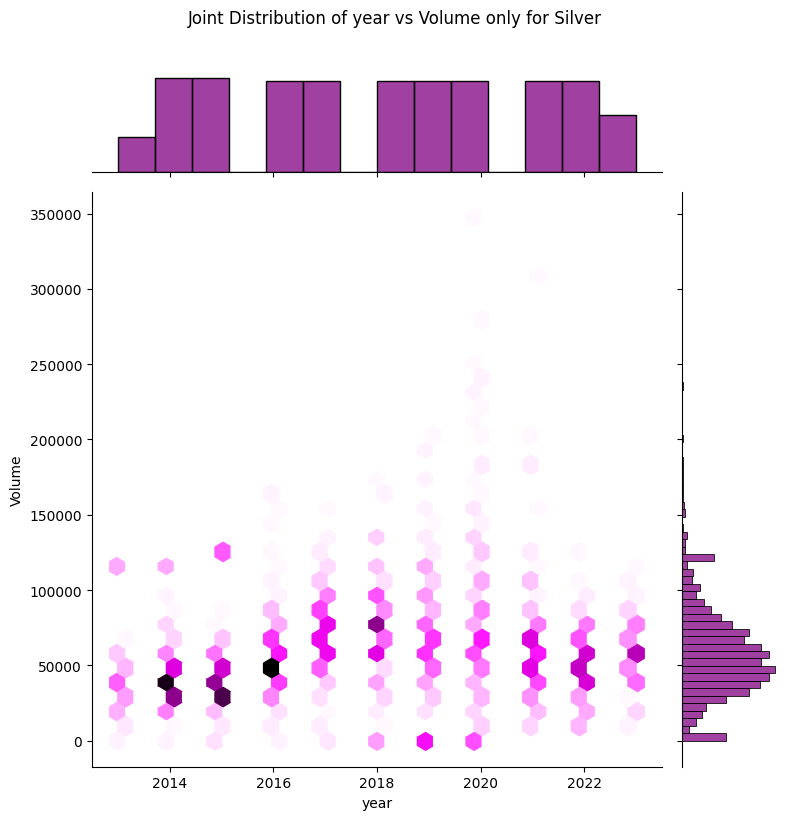

In [60]:
sns.jointplot(data=df[df['G/S']==0], x='year', y='Volume', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of year vs Volume only for Silver', y=1.02)
plt.xlabel('year')
plt.ylabel('Volume')
plt.tight_layout()
plt.show()

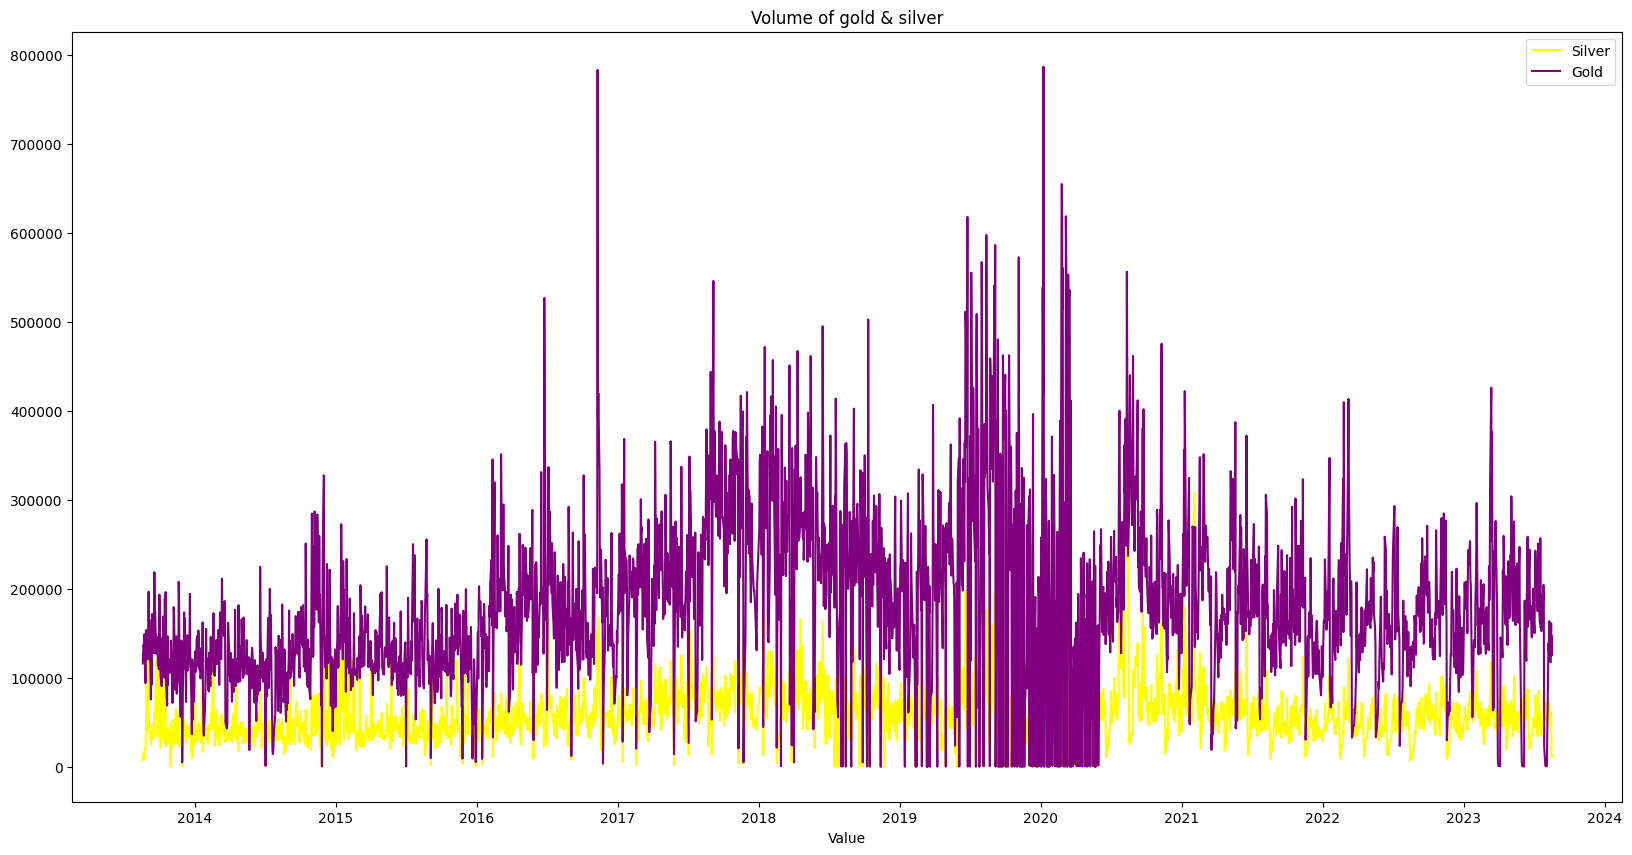

In [61]:
plt.figure(figsize=(20,10))
plt.plot(df[df['G/S']==0]['Date'], df[df['G/S']==0]['Volume'], color = 'yellow')
plt.plot(df[df['G/S']==1]['Date'], df[df['G/S']==1]['Volume'], color = 'purple')
plt.xlabel('Value')
plt.title('Volume of gold & silver')
plt.legend(["Silver","Gold"])

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/1711285519.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


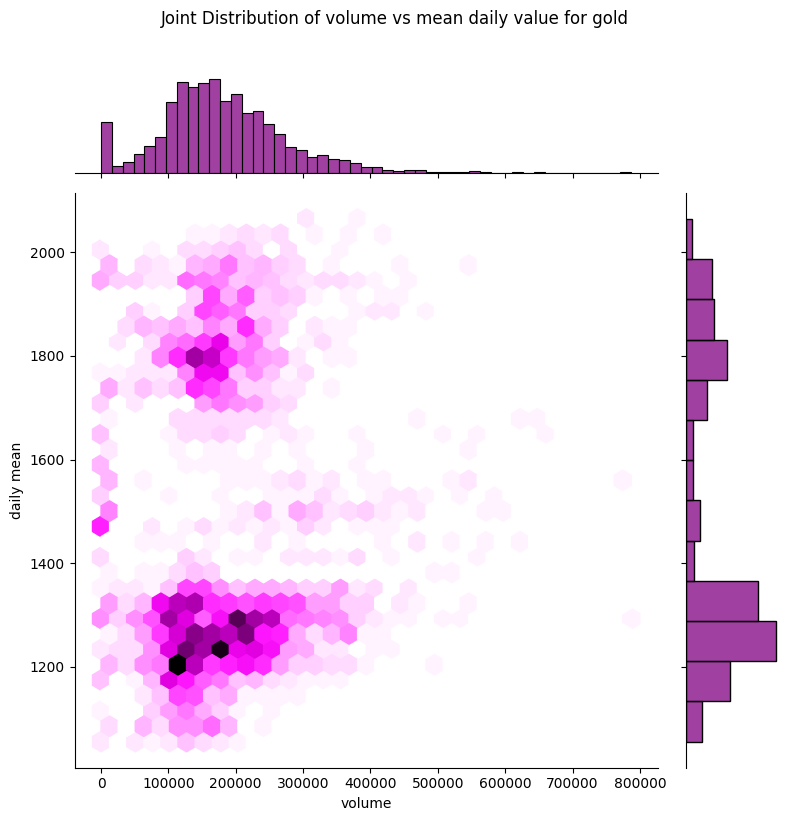

In [71]:
sns.jointplot(data=df[df['G/S']==1], x='Volume', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of volume vs mean daily value for gold', y=1.02)
plt.xlabel('volume')
plt.ylabel('daily mean')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/924552810.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


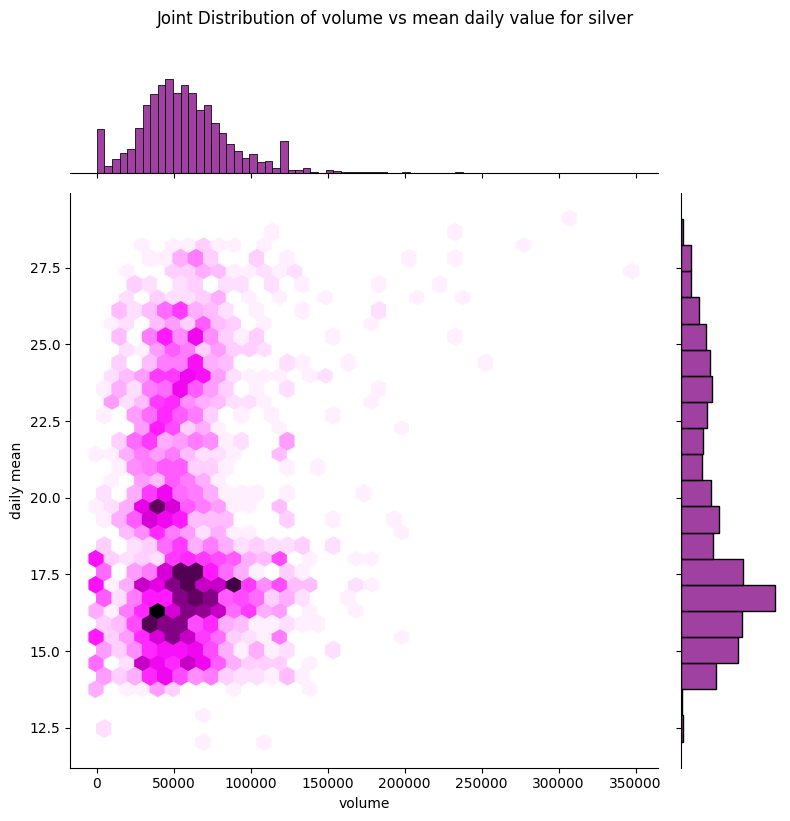

In [72]:
sns.jointplot(data=df[df['G/S']==0], x='Volume', y='mean daily value', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of volume vs mean daily value for silver', y=1.02)
plt.xlabel('volume')
plt.ylabel('daily mean')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/2254599478.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


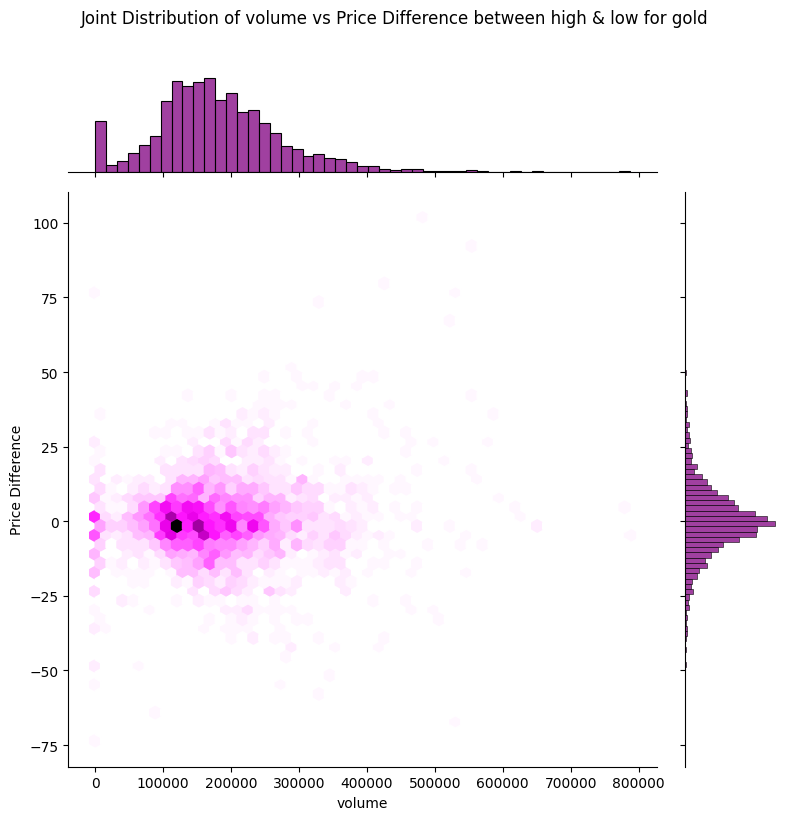

In [73]:
sns.jointplot(data=df[df['G/S']==1], x='Volume', y='Price Difference', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of volume vs Price Difference between high & low for gold', y=1.02)
plt.xlabel('volume')
plt.ylabel('Price Difference')
plt.tight_layout()
plt.show()

/var/folders/4x/dw_b73tj2sgbj6qv46lpbm9h0000gn/T/ipykernel_99031/1602120994.py:5: UserWarning: The figure layout has changed to tight
  plt.tight_layout()


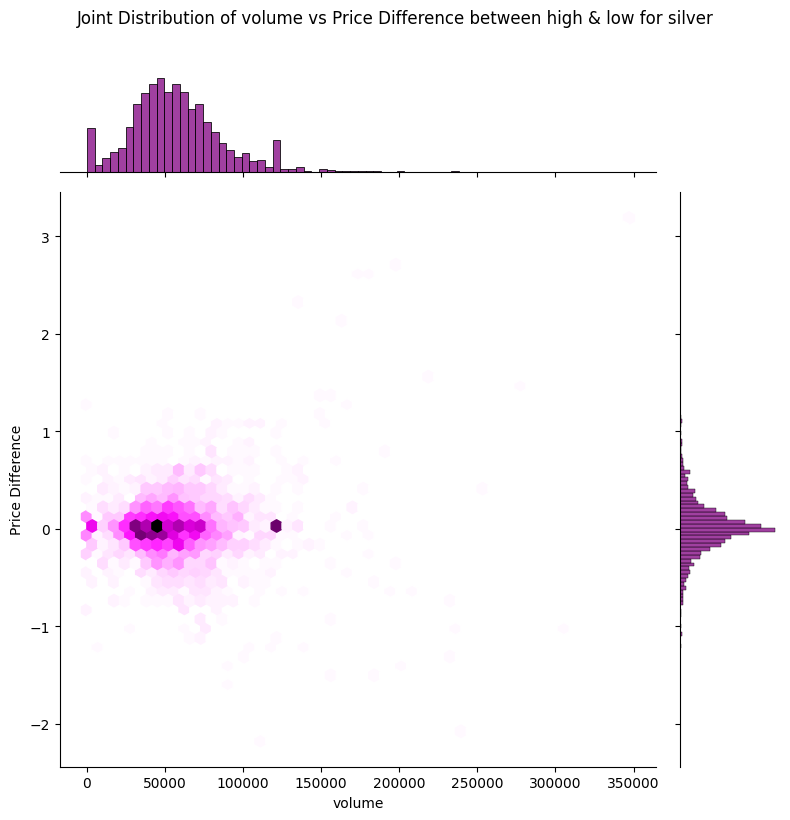

In [74]:
sns.jointplot(data=df[df['G/S']==0], x='Volume', y='Price Difference', kind='hex', color='purple', height=8)
plt.suptitle('Joint Distribution of volume vs Price Difference between high & low for silver', y=1.02)
plt.xlabel('volume')
plt.ylabel('Price Difference')
plt.tight_layout()
plt.show()

In [ ]:
# kabooom. now that's the analysis we can do and see how various days have been for both gold and silver